<a href="https://colab.research.google.com/github/karansingla11223344/Scaler-Clustering-Business-Case/blob/main/Scaler_Clustering_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Scaler - Clustering

# Introduction

The objective of this project is to identify and group learners based on key career attributes-such as job profile,company experience-in order to uncover meaningful clusters of professionals with similar characteristics.This segmentation is crucial to help scaler understand learner career trajectories,profile top companies and roles,enhance personalized recommendations,guide future curriculum and partnerships

the datset used in this project consists of over 200000 observations,1000+ coampanies,diverse roles and includes features such as job position company affiliation,experience,CTC

to achieve meaningful clustering various unsupervised machine learning techniques were applied including KMeans,Hierarchial CLustering,dimensionality reduction techniques like PCA and t-sne

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',None)

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv -O scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 81.2MB/s]


In [ ]:
df=pd.read_csv('scaler_clustering.csv')
df.head()

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

       ctc        job_position  ctc_updated_year  
0  1100000               Other            2020.0  
1   449999  FullStack Engineer            2019.0  
2  2000000    Backend Engineer            2020.0  
3   700000    Backend Engineer            2019.0  
4  1400000  FullStack Engineer            2019.0

In [ ]:
#shape of the dataframe
df.shape

(205843, 7)

In [ ]:
#check the no. of missing values in columns
df.isna().sum(axis=0)

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [ ]:
#No. of employees
df['email_hash'].nunique()

153443

In [ ]:
#total no. of unique companies
df['company_hash'].nunique()

37299

In [ ]:
#different types of jobs
df['job_position'].nunique()

1016

In [ ]:
#drop_duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

       ctc        job_position  ctc_updated_year  
0  1100000               Other            2020.0  
1   449999  FullStack Engineer            2019.0  
2  2000000    Backend Engineer            2020.0  
3   700000    Backend Engineer            2019.0  
4  1400000  FullStack Engineer            2019.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.describe()

Unnamed: 0        orgyear           ctc  ctc_updated_year
count  205843.000000  205757.000000  2.058430e+05     205843.000000
mean   103273.941786    2014.882750  2.271685e+06       2019.628231
std     59741.306484      63.571115  1.180091e+07          1.325104
min         0.000000       0.000000  2.000000e+00       2015.000000
25%     51518.500000    2013.000000  5.300000e+05       2019.000000
50%    103151.000000    2016.000000  9.500000e+05       2020.000000
75%    154992.500000    2018.000000  1.700000e+06       2021.000000
max    206922.000000   20165.000000  1.000150e+09       2021.000000

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

       ctc        job_position  ctc_updated_year  
0  1100000               Other            2020.0  
1   449999  FullStack Engineer            2019.0  
2  2000000    Backend Engineer            2020.0  
3   700000    Backend Engineer            2019.0  
4  1400000  FullStack Engineer            2019.0

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

Index(['orgyear', 'ctc', 'ctc_updated_year'], dtype='object')

# Mean/ KNN Imputation

In [ ]:
df.isna().sum(axis=0)

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [ ]:
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

       ctc        job_position  ctc_updated_year  
0  1100000               Other            2020.0  
1   449999  FullStack Engineer            2019.0  
2  2000000    Backend Engineer            2020.0  
3   700000    Backend Engineer            2019.0  
4  1400000  FullStack Engineer            2019.0

In [ ]:
df_copy=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [ ]:
categorical_columns=['company_hash','job_position','email_hash']
encoders={}
for col in categorical_columns:
  le=LabelEncoder()
  df_copy[col]=df_copy[col].astype(str)
  df_copy[col]=df_copy[col].replace('nan',pd.NA)
  df_copy[col +'_encoded']=le.fit_transform(df_copy[col].astype(str))
  encoders[col]=le

In [ ]:
df_copy.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'company_hash_encoded', 'job_position_encoded',
       'email_hash_encoded'],
      dtype='object')

In [ ]:
impute_cols=[ 'company_hash_encoded', 'orgyear',
       'job_position_encoded', 'email_hash_encoded','ctc','ctc_updated_year']

imputer=KNNImputer(n_neighbors=5)
df_copy[impute_cols]=imputer.fit_transform(df_copy[impute_cols])

#reverse label encoding

for col in categorical_columns:
  enc_col=col +'_encoded'
  df_copy[col +'_filled']=encoders[col].inverse_transform(df_copy[enc_col].round().astype(int))

#cleanup
df_copy.drop(columns=['company_hash_encoded','job_position_encoded'],inplace=True)


In [ ]:
df_copy.isna().sum(axis=0)

company_hash              44
email_hash                 0
orgyear                    0
ctc                        0
job_position           52564
ctc_updated_year           0
email_hash_encoded         0
company_hash_filled        0
job_position_filled        0
email_hash_filled          0
dtype: int64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         205799 non-null  object 
 1   email_hash           205843 non-null  object 
 2   orgyear              205843 non-null  float64
 3   ctc                  205843 non-null  float64
 4   job_position         153279 non-null  object 
 5   ctc_updated_year     205843 non-null  float64
 6   email_hash_encoded   205843 non-null  float64
 7   company_hash_filled  205843 non-null  object 
 8   job_position_filled  205843 non-null  object 
 9   email_hash_filled    205843 non-null  object 
dtypes: float64(4), object(6)
memory usage: 15.7+ MB


In [ ]:
df_copy.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

         ctc        job_position  ctc_updated_year  email_hash_encoded  \
0  1100000.0               Other            2020.0             65787.0   
1   449999.0  FullStack Engineer            2019.0            105915.0   
2  2000000.0    Backend Engineer            2020.0             43304.0   
3   700000.0    Backend Engineer            2019.0            143869.0   
4  1400000.0  FullStack Engineer            2019.0             66994.0   

         company_hash_filled job_position_filled  \
0             atrgxnnt xzaxv               Other   
1  qtrxvzwt xzegwgbb rxbxnta  FullStack Engineer   
2              ojzwnvwnxw vx    Backend Engineer   
3                  ngpgutaxv    Backend Engineer   
4                 qxen sqghu  FullStack Engineer   

                                                  email_hash_filled  
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af  
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b  
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059  
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7  
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095

In [ ]:
df_copy['job_position_filled']=df_copy['job_position_filled'].replace(['NA','<NA>','nan','NAN'],np.nan)

In [ ]:
#get the mode(most frequent job title)
most_common_job=df_copy['job_position_filled'].mode(dropna=True)[0]
#fill the remaining NA values
df_copy.loc[df_copy['job_position_filled'].isna(),'job_position_filled']=(most_common_job)

In [ ]:
df_copy['job_position_filled'].value_counts()

job_position_filled
Backend Engineer                    96118
FullStack Engineer                  24717
Other                               18071
Frontend Engineer                   10417
Engineering Leadership               6870
                                    ...  
Business Analyst / Product Owner        1
Principal consultant                    1
App Developer                           1
Digital Marketing                       1
Jr. Prod Specialist                     1
Name: count, Length: 1016, dtype: int64

In [ ]:
df_copy.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                                         email_hash  orgyear  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   2016.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   2018.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   2015.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   2017.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   2017.0   

         ctc        job_position  ctc_updated_year  email_hash_encoded  \
0  1100000.0               Other            2020.0             65787.0   
1   449999.0  FullStack Engineer            2019.0            105915.0   
2  2000000.0    Backend Engineer            2020.0             43304.0   
3   700000.0    Backend Engineer            2019.0            143869.0   
4  1400000.0  FullStack Engineer            2019.0             66994.0   

         company_hash_filled job_position_filled  \
0             atrgxnnt xzaxv               Other   
1  qtrxvzwt xzegwgbb rxbxnta  FullStack Engineer   
2              ojzwnvwnxw vx    Backend Engineer   
3                  ngpgutaxv    Backend Engineer   
4                 qxen sqghu  FullStack Engineer   

                                                  email_hash_filled  
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af  
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b  
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059  
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7  
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095

In [ ]:
df_copy.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'email_hash_encoded', 'company_hash_filled',
       'job_position_filled', 'email_hash_filled'],
      dtype='object')

In [ ]:
df_copy.drop(columns=['company_hash', 'email_hash','email_hash_encoded','job_position'],inplace=True)

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year        company_hash_filled  \
0   2016.0  1100000.0            2020.0             atrgxnnt xzaxv   
1   2018.0   449999.0            2019.0  qtrxvzwt xzegwgbb rxbxnta   
2   2015.0  2000000.0            2020.0              ojzwnvwnxw vx   
3   2017.0   700000.0            2019.0                  ngpgutaxv   
4   2017.0  1400000.0            2019.0                 qxen sqghu   

  job_position_filled  \
0               Other   
1  FullStack Engineer   
2    Backend Engineer   
3    Backend Engineer   
4  FullStack Engineer   

                                                  email_hash_filled  
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af  
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b  
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059  
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7  
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095

# Regex for cleaning company names

In [ ]:
import re

In [ ]:
df_copy.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'company_hash_filled',
       'job_position_filled', 'email_hash_filled'],
      dtype='object')

clean text columns(like job titles,emails,compamy names)

remove punctuation,spaces and special symbols

keep only letters and numbers

this function removes all non-alphanumeric characters from the string  

In [ ]:
df_copy['job_position_filled_cleaned']=df_copy['job_position_filled'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))

In [ ]:
df_copy['company_hash_filled_cleaned']=df_copy['company_hash_filled'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))

In [ ]:
df_copy.drop(columns=['job_position_filled','company_hash_filled'],inplace=True)

In [ ]:
df_copy['job_position_filled_cleaned'].value_counts()

job_position_filled_cleaned
Backend Engineer                           96118
FullStack Engineer                         24717
Other                                      18071
Frontend Engineer                          10417
Engineering Leadership                      6870
                                           ...  
Programmar analyst                             1
Software Developer grade1                      1
Software Development Engineering Intern        1
Team Lead  Android                             1
Cloud Engineer                                 1
Name: count, Length: 1004, dtype: int64

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  
0                       Other              atrgxnnt xzaxv  
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta  
2            Backend Engineer               ojzwnvwnxw vx  
3            Backend Engineer                   ngpgutaxv  
4          FullStack Engineer                  qxen sqghu

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  
0                       Other              atrgxnnt xzaxv  
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta  
2            Backend Engineer               ojzwnvwnxw vx  
3            Backend Engineer                   ngpgutaxv  
4          FullStack Engineer                  qxen sqghu

In [ ]:
df_copy.isna().sum(axis=0)

orgyear                        0
ctc                            0
ctc_updated_year               0
email_hash_filled              0
job_position_filled_cleaned    0
company_hash_filled_cleaned    0
dtype: int64

In [ ]:
#new features
df_copy['years_of_experience']=df['ctc_updated_year']-df['orgyear']
df_copy['years_of_experience']=df_copy['years_of_experience'].apply(lambda x : max(0,x) if pd.notnull(x) else 0)

In [ ]:
df_copy.isna().sum(axis=0)

orgyear                        0
ctc                            0
ctc_updated_year               0
email_hash_filled              0
job_position_filled_cleaned    0
company_hash_filled_cleaned    0
years_of_experience            0
dtype: int64

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  years_of_experience  
0                       Other              atrgxnnt xzaxv                  4.0  
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta                  1.0  
2            Backend Engineer               ojzwnvwnxw vx                  5.0  
3            Backend Engineer                   ngpgutaxv                  2.0  
4          FullStack Engineer                  qxen sqghu                  2.0

take only those observations which have orgyear between 1990 and 2025.

CTC should be at least 100000

In [ ]:
df_copy['orgyear']=pd.to_numeric(df_copy['orgyear'],errors='coerce')

df_copy=df_copy[(df_copy['orgyear']>=1990) & (df_copy['orgyear']<=2025) &(df_copy['ctc']>100000)]

In [ ]:
df_copy['ctc_updated_year']=pd.to_numeric(df_copy['ctc_updated_year'],errors='coerce')

df_copy=df_copy[(df_copy['ctc_updated_year']>=1990) & (df_copy['ctc_updated_year']<=2025)]

/tmp/ipython-input-49-2892407323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['ctc_updated_year']=pd.to_numeric(df_copy['ctc_updated_year'],errors='coerce')


outliers treatment

In [ ]:
#ctc
per_75=np.percentile(df_copy['ctc'],75)
per_25=np.percentile(df_copy['ctc'],25)
iqr=per_75-per_25
upper_limit=per_75 + 1.5 * iqr
lower_limit=per_25 - 1.5 * iqr
df_copy.loc[df_copy['ctc']>upper_limit,'ctc']=upper_limit
df_copy.loc[df_copy['ctc']<lower_limit,'ctc']=lower_limit

# Univariate analysis

In [ ]:
job_counts=df_copy['job_position_filled_cleaned'].value_counts().reset_index()[0:10]
job_counts

job_position_filled_cleaned  count
0            Backend Engineer  93469
1          FullStack Engineer  23685
2                       Other  17422
3           Frontend Engineer  10149
4      Engineering Leadership   6692
5                 QA Engineer   6473
6              Data Scientist   5228
7            Android Engineer   5191
8                        SDET   4923
9             Devops Engineer   4520

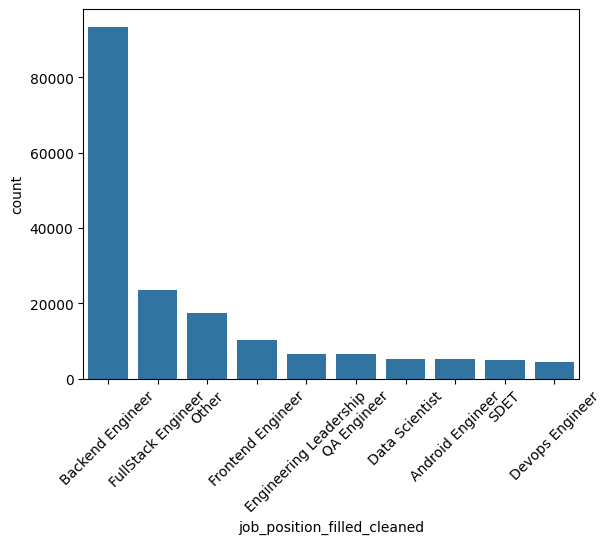

In [ ]:
sns.barplot(job_counts,x='job_position_filled_cleaned',y='count')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='ctc'>

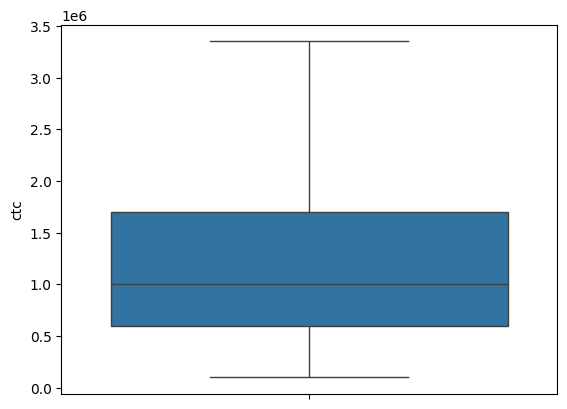

In [ ]:
sns.boxplot(y='ctc',data=df_copy)

# Bivariate analysis

In [ ]:
df_copy_bi_an=df_copy.copy()

In [ ]:
df_copyy=df_copy.copy()

<Axes: xlabel='years_of_experience', ylabel='ctc'>

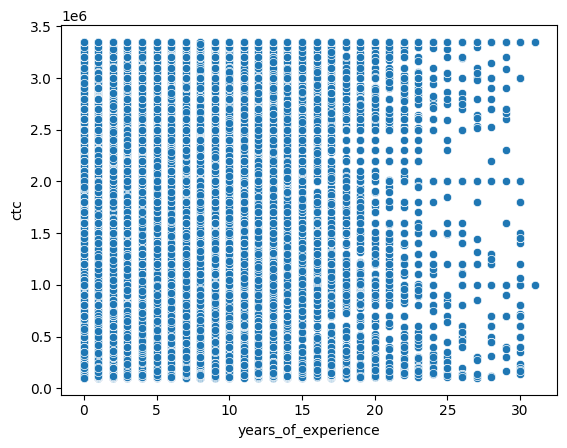

In [ ]:
sns.scatterplot(x='years_of_experience',y='ctc',data=df_copyy)

observation

we see that at every years of experience we have 34 lakh earning employees

top right side of plot suggests that these employees are genius or startup professionals

even after 23 years of experience ,some employees earning near to 5,6 lakh may be these jobs are less growth jobs


In [ ]:
df_copy_bi_an['ctc_log']=np.log(df_copy_bi_an['ctc'])

<Axes: xlabel='ctc_log', ylabel='Count'>

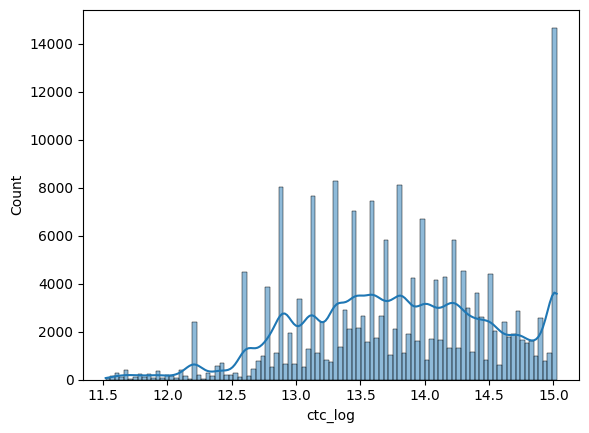

In [ ]:
sns.histplot(data=df_copy_bi_an,x='ctc_log',kde=True)

<Axes: xlabel='ctc', ylabel='Count'>

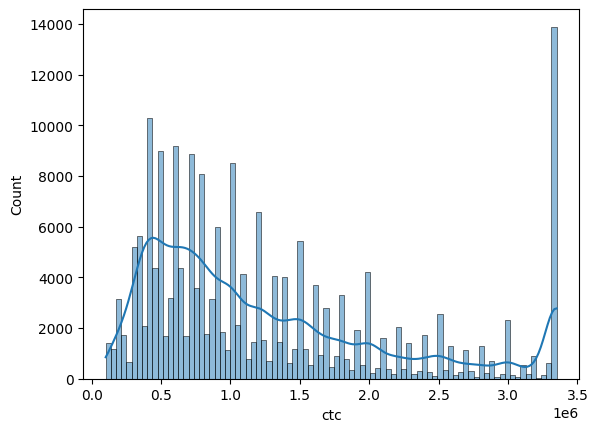

In [ ]:
sns.histplot(data=df_copy_bi_an,x='ctc',kde=True)

Observation

from ctc distribution plot suggest that data is heavely right skewed with thick heavy tail.this happens most of times in salary distribution even after apply log transformation there is thick heavy tail

<Axes: ylabel='ctc'>

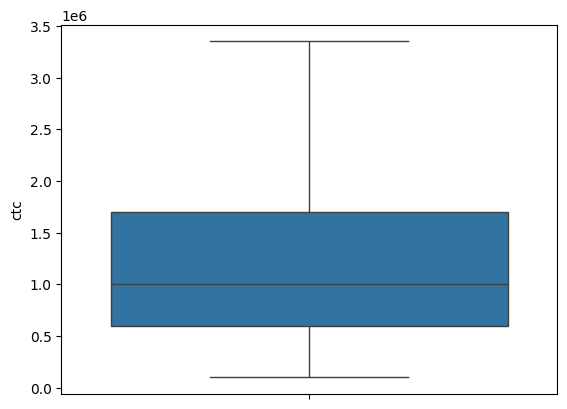

In [ ]:
sns.boxplot(y='ctc',data=df_copyy)

observation

1.Median CTC is around 1million(10 lakh).half of the employees earn less than this

2. the box spans from 6 lakh  to 18 lakh.this suggests 50% of employees falls within this range

3.there is also some employees whose salary is 34 lakh or above

In [ ]:
df_copy_bi_an.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  \
0                       Other              atrgxnnt xzaxv   
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2            Backend Engineer               ojzwnvwnxw vx   
3            Backend Engineer                   ngpgutaxv   
4          FullStack Engineer                  qxen sqghu   

   years_of_experience    ctc_log  
0                  4.0  13.910821  
1                  1.0  13.017001  
2                  5.0  14.508658  
3                  2.0  13.458836  
4                  2.0  14.151983

In [ ]:
df_copy_bi_an['exp_bins']=pd.cut(df_copy_bi_an['years_of_experience'],bins=(0,3,7,8),labels=('0-3','3-7','7>'))

<Axes: xlabel='exp_bins', ylabel='ctc'>

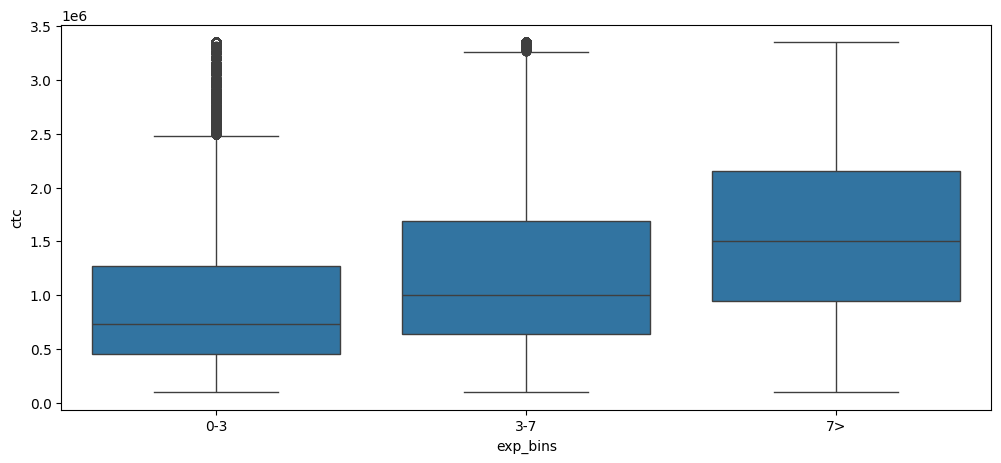

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_copy_bi_an,x='exp_bins',y='ctc')

Observation

Distribution plot based on years of experience,we see that the with years of experience median  salary increases.

average median salary of employees with 0-3 years of experience is 7.5 lakh .more outliers after 25 lakh

average median salary of employees with 3-7 years of experience is 10 lakh

average median salary of employees with 0-3 years of experience is 15 lakh.more consistent near upper limit





In [ ]:
top_15_job=df_copy_bi_an['job_position_filled_cleaned'].value_counts().index[0:15]

In [ ]:
df_copy_bi_an_top_15=df_copy_bi_an[df_copy_bi_an['job_position_filled_cleaned'].isin(top_15_job)]
df_copy_bi_an_top_15

orgyear        ctc  ctc_updated_year  \
0        2016.0  1100000.0            2020.0   
1        2018.0   449999.0            2019.0   
2        2015.0  2000000.0            2020.0   
3        2017.0   700000.0            2019.0   
4        2017.0  1400000.0            2019.0   
...         ...        ...               ...   
205838   2008.0   220000.0            2019.0   
205839   2017.0   500000.0            2020.0   
205840   2021.0   700000.0            2021.0   
205841   2019.0  3350000.0            2019.0   
205842   2014.0  1240000.0            2016.0   

                                                       email_hash_filled  \
0       6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1       b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2       4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3       effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4       6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   
...                                                                  ...   
205838  70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05   
205839  7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53   
205840  cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c   
205841  fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699   
205842  0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31   

       job_position_filled_cleaned company_hash_filled_cleaned  \
0                            Other              atrgxnnt xzaxv   
1               FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2                 Backend Engineer               ojzwnvwnxw vx   
3                 Backend Engineer                   ngpgutaxv   
4               FullStack Engineer                  qxen sqghu   
...                            ...                         ...   
205838            Backend Engineer                   vuurt xzw   
205839            Backend Engineer                   husqvawgb   
205840            Backend Engineer                    vwwgrxnt   
205841            Backend Engineer              zgn vuurxwvmrt   
205842            Backend Engineer              bgqsvz onvzrtj   

        years_of_experience    ctc_log exp_bins  
0                       4.0  13.910821      3-7  
1                       1.0  13.017001      0-3  
2                       5.0  14.508658      3-7  
3                       2.0  13.458836      0-3  
4                       2.0  14.151983      0-3  
...                     ...        ...      ...  
205838                 11.0  12.301383      NaN  
205839                  3.0  13.122363      0-3  
205840                  0.0  13.458836      NaN  
205841                  0.0  15.024471      NaN  
205842                  2.0  14.030622      0-3  

[190691 rows x 9 columns]

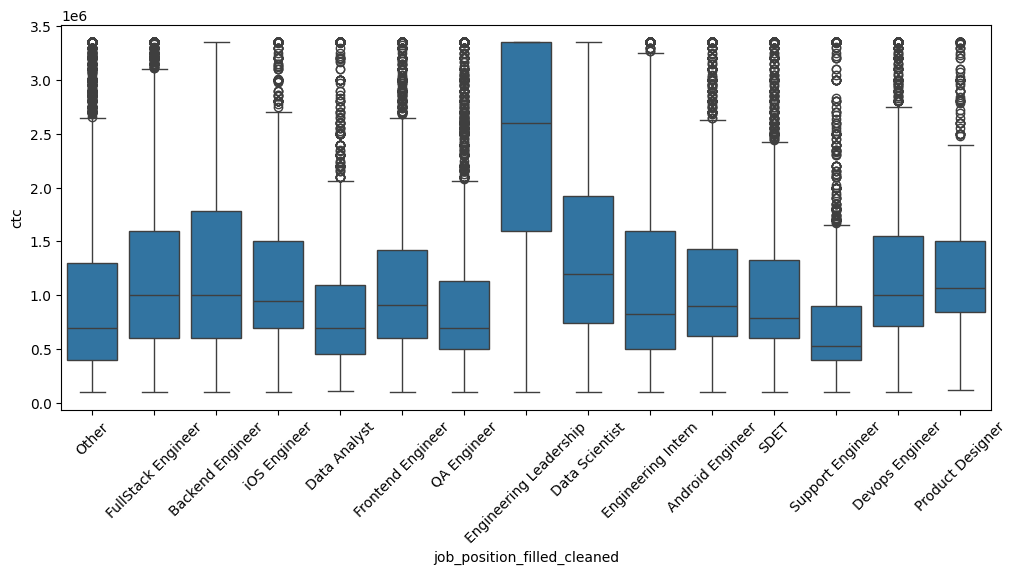

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_copy_bi_an_top_15,x='job_position_filled_cleaned',y='ctc')
plt.xticks(rotation=45)
plt.show()

Observations

1.Engineering leadership jobs have highest median CTC(27 lakh) and also 50% employees CTC lies between 15 lakh and 35 lakh

2.(Fullstack engineer, Data Scientist and Backend) jobs have high median CTC as campared to other jobs

3.Data analyst,QA engineer,support Engineer jobs have less median CTC as campared to other jobs


In [ ]:
#top 15 comapnies based on no. of employees(count)

In [ ]:
top_15_company=df_copy_bi_an['company_hash_filled_cleaned'].value_counts().index[0:15]

In [ ]:
df_copy_bi_an_top_15_co=df_copy_bi_an[df_copy_bi_an['company_hash_filled_cleaned'].isin(top_15_company)]
df_copy_bi_an_top_15_co

orgyear        ctc  ctc_updated_year  \
13       2016.0   440000.0            2020.0   
83       2015.0   750000.0            2019.0   
146      2013.0   440000.0            2019.0   
194      2012.0   650000.0            2020.0   
200      2015.0   500000.0            2020.0   
...         ...        ...               ...   
205808   2013.0  3350000.0            2019.0   
205814   2016.0   336000.0            2017.0   
205825   2016.0  3350000.0            2020.0   
205826   2017.0  2100000.0            2018.0   
205833   2014.0  3350000.0            2019.0   

                                                       email_hash_filled  \
13      134cc4a76a119493d523f1855a3b7106f64287455d5cd4bb14f4ad0659fe8a5f   
83      985f3ffced0e16713147c7c36ec70c5414cc9d6c79fe9d940fa55672c4e3da07   
146     1cba0b0e58d34d36b4ca044e446e6f2cb6d0ed66f99fc4ad5879077b291ff0e5   
194     40c3aa96dc75d365faa0c673d604376a7d59ea90b13cce85c2dd05a1a08fa3b9   
200     bd8f9c507f4b847fdfa09fb58c70137411406d11892a21d4e70677c25aca44cc   
...                                                                  ...   
205808  6992f22d82e33d5e9c625dd2799b874868b6c8dc03fa163669469eb28765edf6   
205814  3160bf08b3a731a51d4672e910654df75cec2d58f9c3e35c835bbc502f1348d3   
205825  95023bca0172ad67bfc3453550c5cf056557bc2c8c7169c45d544526834d19a4   
205826  3467ccdf01adc36d8250a2a5edc99dfa5af05c102ccb19cecbd1c0930ee7727f   
205833  f4415be48a1ef885e086dcd72181f667a289641e66f828159d7154228a9b9a95   

       job_position_filled_cleaned company_hash_filled_cleaned  \
13                    Data Analyst                   wgszxkvzn   
83                           Other                   wgszxkvzn   
146                   Data Analyst      zgn vuurxwvmrt vwwghzn   
194               Backend Engineer                     xzegojo   
200               Support Engineer            ywr ntwyzgrgsxto   
...                            ...                         ...   
205808            Backend Engineer                      vbvkgz   
205814            Backend Engineer   nvnv wgzohrnvzwj otqcxwto   
205825            Backend Engineer                      vbvkgz   
205826            Backend Engineer                       vagmt   
205833            Backend Engineer                      vbvkgz   

        years_of_experience    ctc_log exp_bins  
13                      4.0  12.994530      3-7  
83                      4.0  13.527828      3-7  
146                     6.0  12.994530      3-7  
194                     8.0  13.384728       7>  
200                     5.0  13.122363      3-7  
...                     ...        ...      ...  
205808                  6.0  15.024471      3-7  
205814                  1.0  12.724866      0-3  
205825                  4.0  15.024471      3-7  
205826                  1.0  14.557448      0-3  
205833                  5.0  15.024471      3-7  

[42385 rows x 9 columns]

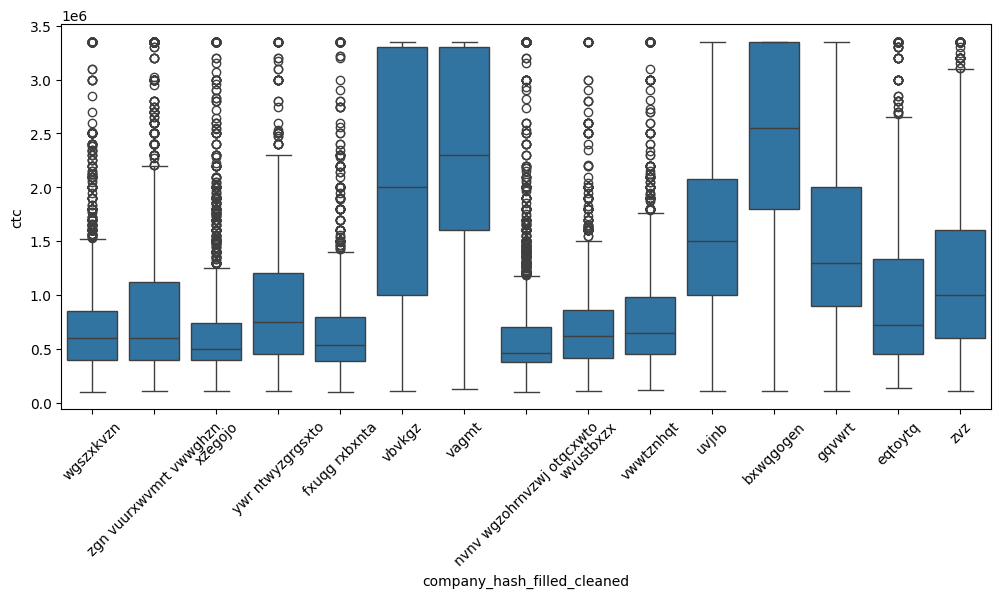

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_copy_bi_an_top_15_co,x='company_hash_filled_cleaned',y='ctc')
plt.xticks(rotation=45)
plt.show()

Observation

1.even in those companies which recruit employees in bulk have so much variation.

2.some employees have median CTC in comapanies lies between(20-25)lakh

3.some employees have median CTC in different companies between(7-10)lakh

4,this suggests that companies play big role in CTC even in those companies which recruit in bulk

In [ ]:
last_10_year=list(range(2014,2026,1))

In [ ]:
df_copy_bi_an_last_10_year=df_copy_bi_an[df_copy_bi_an['ctc_updated_year'].isin(last_10_year)]
df_copy_bi_an_last_10_year

orgyear        ctc  ctc_updated_year  \
0        2016.0  1100000.0            2020.0   
1        2018.0   449999.0            2019.0   
2        2015.0  2000000.0            2020.0   
3        2017.0   700000.0            2019.0   
4        2017.0  1400000.0            2019.0   
...         ...        ...               ...   
205838   2008.0   220000.0            2019.0   
205839   2017.0   500000.0            2020.0   
205840   2021.0   700000.0            2021.0   
205841   2019.0  3350000.0            2019.0   
205842   2014.0  1240000.0            2016.0   

                                                       email_hash_filled  \
0       6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1       b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2       4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3       effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4       6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   
...                                                                  ...   
205838  70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05   
205839  7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53   
205840  cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c   
205841  fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699   
205842  0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31   

       job_position_filled_cleaned company_hash_filled_cleaned  \
0                            Other              atrgxnnt xzaxv   
1               FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2                 Backend Engineer               ojzwnvwnxw vx   
3                 Backend Engineer                   ngpgutaxv   
4               FullStack Engineer                  qxen sqghu   
...                            ...                         ...   
205838            Backend Engineer                   vuurt xzw   
205839            Backend Engineer                   husqvawgb   
205840            Backend Engineer                    vwwgrxnt   
205841            Backend Engineer              zgn vuurxwvmrt   
205842            Backend Engineer              bgqsvz onvzrtj   

        years_of_experience    ctc_log exp_bins  
0                       4.0  13.910821      3-7  
1                       1.0  13.017001      0-3  
2                       5.0  14.508658      3-7  
3                       2.0  13.458836      0-3  
4                       2.0  14.151983      0-3  
...                     ...        ...      ...  
205838                 11.0  12.301383      NaN  
205839                  3.0  13.122363      0-3  
205840                  0.0  13.458836      NaN  
205841                  0.0  15.024471      NaN  
205842                  2.0  14.030622      0-3  

[199880 rows x 9 columns]

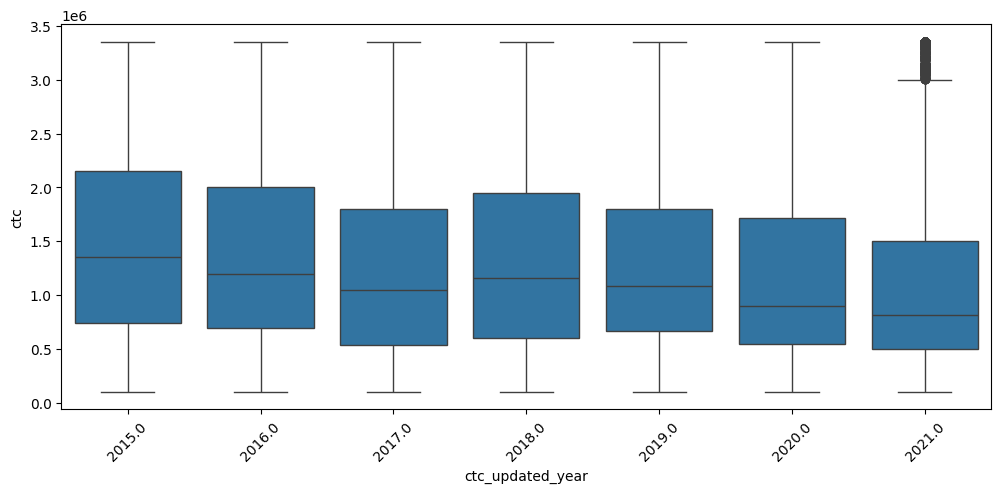

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_copy_bi_an_last_10_year,x='ctc_updated_year',y='ctc')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ctc_updated_year_i=df_copy_bi_an.groupby('ctc_updated_year')['ctc'].mean().reset_index()

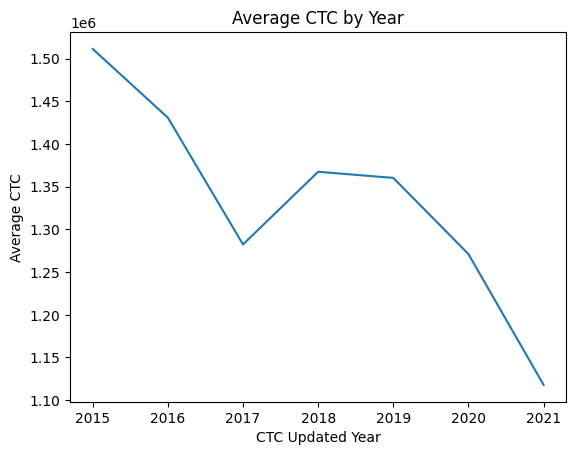

In [ ]:
plt.plot(ctc_updated_year_i['ctc_updated_year'], ctc_updated_year_i['ctc'])
plt.xlabel('CTC Updated Year')
plt.ylabel('Average CTC')
plt.title('Average CTC by Year')
plt.show()

observation

distribution of ctc based on year.In 2015,median CTC of the highest 13-14 lakh.after that median ctc per year is decreasing.in 2018 some jump but after that median CTC per year is decreasing.may be demand is not that high which is
in 2015,2018,.may be trend change in near future for more upward movement of median CTC per year

trend of top 10 jobs year wise

In [ ]:
top_10_jobs=(df_copy_bi_an['job_position_filled_cleaned'].value_counts().sort_values(ascending=False).head(10).index)

In [ ]:
top_10_jobs

Index(['Backend Engineer', 'FullStack Engineer', 'Other', 'Frontend Engineer',
       'Engineering Leadership', 'QA Engineer', 'Data Scientist',
       'Android Engineer', 'SDET', 'Devops Engineer'],
      dtype='object', name='job_position_filled_cleaned')

In [ ]:
top_10_jobs_year=df_copy_bi_an[df_copy_bi_an['job_position_filled_cleaned'].isin(top_10_jobs)]

In [ ]:
grouped_data=top_10_jobs_year.groupby(['ctc_updated_year','job_position_filled_cleaned'])['ctc'].mean().reset_index()

In [ ]:
grouped_data

ctc_updated_year job_position_filled_cleaned           ctc
0             2015.0            Android Engineer  1.228439e+06
1             2015.0            Backend Engineer  1.540806e+06
2             2015.0              Data Scientist  1.572802e+06
3             2015.0             Devops Engineer  1.174167e+06
4             2015.0      Engineering Leadership  2.117680e+06
5             2015.0           Frontend Engineer  1.146857e+06
6             2015.0          FullStack Engineer  1.470953e+06
7             2015.0                       Other  1.228641e+06
8             2015.0                 QA Engineer  1.006095e+06
9             2015.0                        SDET  1.375974e+06
10            2016.0            Android Engineer  1.387969e+06
11            2016.0            Backend Engineer  1.438454e+06
12            2016.0              Data Scientist  1.428479e+06
13            2016.0             Devops Engineer  1.431710e+06
14            2016.0      Engineering Leadership  2.084094e+06
15            2016.0           Frontend Engineer  1.140957e+06
16            2016.0          FullStack Engineer  1.294634e+06
17            2016.0                       Other  1.215171e+06
18            2016.0                 QA Engineer  1.173787e+06
19            2016.0                        SDET  1.347208e+06
20            2017.0            Android Engineer  1.249853e+06
21            2017.0            Backend Engineer  1.364726e+06
22            2017.0              Data Scientist  1.382014e+06
23            2017.0             Devops Engineer  1.026233e+06
24            2017.0      Engineering Leadership  2.029683e+06
25            2017.0           Frontend Engineer  9.977990e+05
26            2017.0          FullStack Engineer  1.130276e+06
27            2017.0                       Other  9.462682e+05
28            2017.0                 QA Engineer  8.427014e+05
29            2017.0                        SDET  1.330509e+06
30            2018.0            Android Engineer  1.218608e+06
31            2018.0            Backend Engineer  1.396814e+06
32            2018.0              Data Scientist  1.644557e+06
33            2018.0             Devops Engineer  1.507331e+06
34            2018.0      Engineering Leadership  2.204577e+06
35            2018.0           Frontend Engineer  1.110737e+06
36            2018.0          FullStack Engineer  1.053678e+06
37            2018.0                       Other  1.398692e+06
38            2018.0                 QA Engineer  1.007060e+06
39            2018.0                        SDET  1.596145e+06
40            2019.0            Android Engineer  1.008829e+06
41            2019.0            Backend Engineer  1.410004e+06
42            2019.0              Data Scientist  1.418304e+06
43            2019.0             Devops Engineer  1.230812e+06
44            2019.0      Engineering Leadership  2.553597e+06
45            2019.0           Frontend Engineer  1.194267e+06
46            2019.0          FullStack Engineer  1.305478e+06
47            2019.0                       Other  1.031323e+06
48            2019.0                 QA Engineer  9.899115e+05
49            2019.0                        SDET  9.221548e+05
50            2020.0            Android Engineer  1.472433e+06
51            2020.0            Backend Engineer  1.316245e+06
52            2020.0              Data Scientist  1.425877e+06
53            2020.0             Devops Engineer  1.422890e+06
54            2020.0      Engineering Leadership  2.176907e+06
55            2020.0           Frontend Engineer  1.161588e+06
56            2020.0          FullStack Engineer  1.260244e+06
57            2020.0                       Other  1.046307e+06
58            2020.0                 QA Engineer  9.952375e+05
59            2020.0                        SDET  1.499388e+06
60            2021.0            Android Engineer  1.185687e+06
61            2021.0            Backend Engineer  1.142219e+06
62            2021.0              D

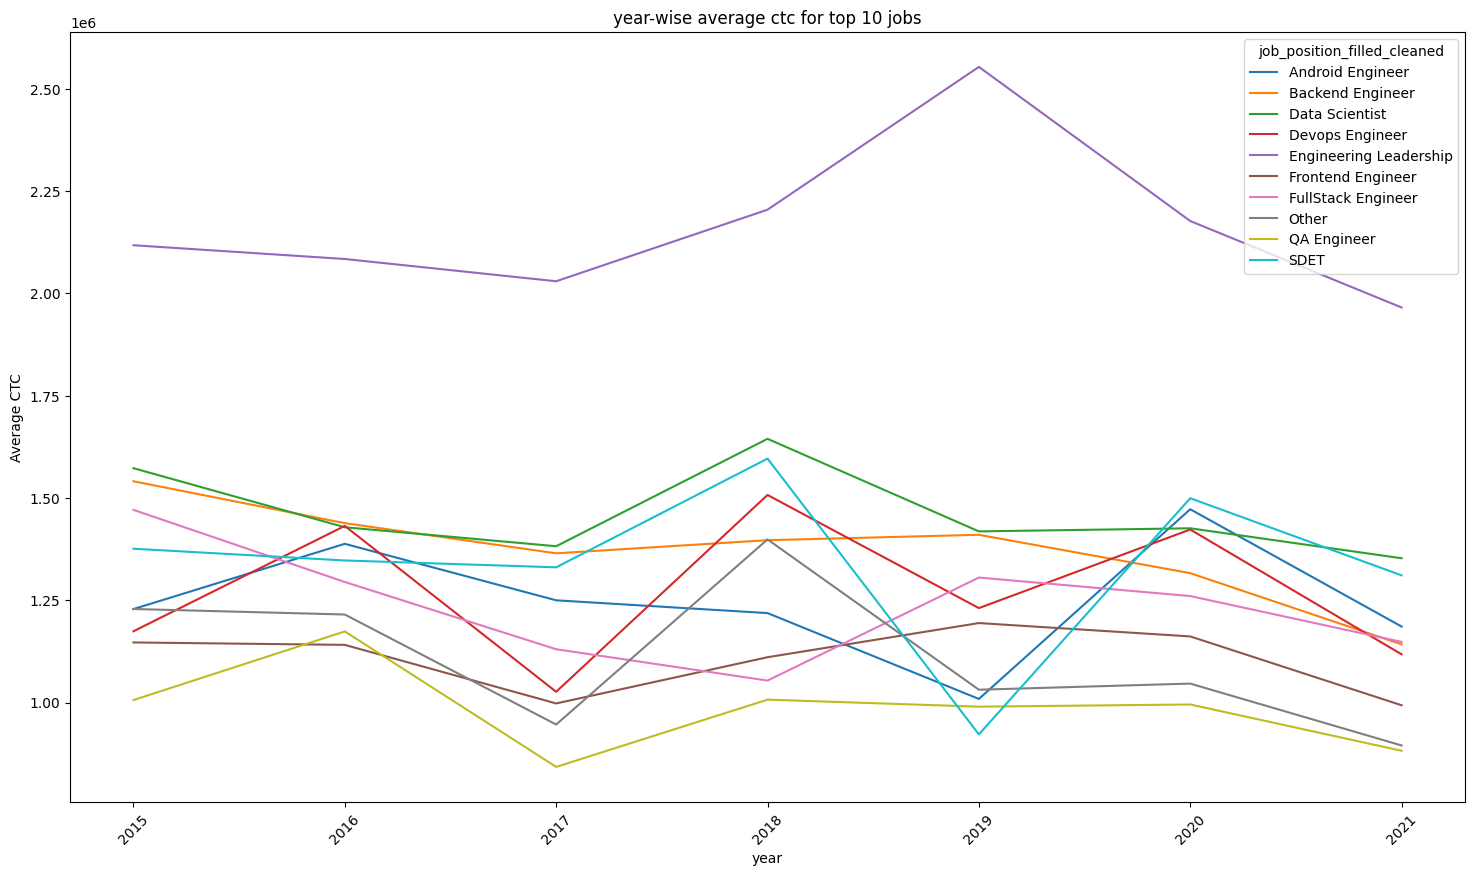

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(data=grouped_data,x='ctc_updated_year',y='ctc',hue='job_position_filled_cleaned')
plt.title('year-wise average ctc for top 10 jobs')
plt.xlabel('year')
plt.ylabel('Average CTC')
plt.xticks(rotation=45)
plt.show()

Observation

year wise trend is lies between 10lpa to 15 lpa for most jobs

data scientist has more constant trend with 15 lpa per year average

trend is constant for all jobs some years they have high mean ctc some year less not much dramatic change occurs during 2015-2021

engineering leadership have highest average CTC per year





# Manual clustering

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  years_of_experience  
0                       Other              atrgxnnt xzaxv                  4.0  
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta                  1.0  
2            Backend Engineer               ojzwnvwnxw vx                  5.0  
3            Backend Engineer                   ngpgutaxv                  2.0  
4          FullStack Engineer                  qxen sqghu                  2.0

In [ ]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [ ]:
colum=['company_hash_filled_cleaned','job_position_filled_cleaned','years_of_experience']

In [ ]:
summary=df_copy.groupby(colum)['ctc'].agg(mean_ctc='mean',median_ctc='median',max_ctc='max',min_ctc='min',count='count').reset_index()

In [ ]:
summary.head()

company_hash_filled_cleaned job_position_filled_cleaned  \
0                            0000                       Other   
1                      01 ojztqsj            Android Engineer   
2                      01 ojztqsj           Frontend Engineer   
3  05mz exzytvrny uqxcvnt rxbxnta            Backend Engineer   
4                               1                       Other   

   years_of_experience   mean_ctc  median_ctc    max_ctc    min_ctc  count  
0                  3.0   300000.0    300000.0   300000.0   300000.0      1  
1                  3.0   270000.0    270000.0   270000.0   270000.0      1  
2                  8.0   830000.0    830000.0   830000.0   830000.0      1  
3                  2.0  1100000.0   1100000.0  1100000.0  1100000.0      2  
4                  0.0   250000.0    250000.0   250000.0   250000.0      1

In [ ]:
#merge
df_copy=df_copy.merge(summary,on=colum,how='left')

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  \
0                       Other              atrgxnnt xzaxv   
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2            Backend Engineer               ojzwnvwnxw vx   
3            Backend Engineer                   ngpgutaxv   
4          FullStack Engineer                  qxen sqghu   

   years_of_experience      mean_ctc  median_ctc    max_ctc    min_ctc  count  
0                  4.0  1.085000e+06   1085000.0  1100000.0  1070000.0      2  
1                  1.0  4.599995e+05    459999.5   470000.0   449999.0      2  
2                  5.0  2.000000e+06   2000000.0  2000000.0  2000000.0      1  
3                  2.0  1.361667e+06   1375000.0  1950000.0   700000.0     12  
4                  2.0  1.000000e+06   1000000.0  1400000.0   600000.0      2

In [ ]:
#create flag -designation
def get_designation_flag(row):
  if row['ctc']>row['mean_ctc']:
    return 1
  elif row['ctc'] == row['mean_ctc']:
    return 2
  else:
    return 3
df_copy['designation']=df_copy.apply(get_designation_flag,axis=1)

In [ ]:
df_copy['designation'].value_counts()

designation
2    88642
3    63480
1    47758
Name: count, dtype: int64

observation

Majority of people (91000) are earning near the average for their role and experience in the same company

49000 people are outperforming their peers.

64000 people are underpaid

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  \
0                       Other              atrgxnnt xzaxv   
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2            Backend Engineer               ojzwnvwnxw vx   
3            Backend Engineer                   ngpgutaxv   
4          FullStack Engineer                  qxen sqghu   

   years_of_experience      mean_ctc  median_ctc    max_ctc    min_ctc  count  \
0                  4.0  1.085000e+06   1085000.0  1100000.0  1070000.0      2   
1                  1.0  4.599995e+05    459999.5   470000.0   449999.0      2   
2                  5.0  2.000000e+06   2000000.0  2000000.0  2000000.0      1   
3                  2.0  1.361667e+06   1375000.0  1950000.0   700000.0     12   
4                  2.0  1.000000e+06   1000000.0  1400000.0   600000.0      2   

   designation  
0            1  
1            3  
2            2  
3            3  
4            1

In [ ]:
#class-Level analysis : company+job position
class_keys=['company_hash_filled_cleaned','job_position_filled_cleaned']
class_summary=df_copy.groupby(class_keys)['ctc'].agg(mean_ctc_class='mean').reset_index()
df_copy=df_copy.merge(class_summary,on=class_keys,how='left')



In [ ]:
def get_class_flag(row):
  if row['ctc']>row['mean_ctc_class']:
    return 1
  elif row['ctc']==row['mean_ctc_class']:
    return 2
  else :
    return 3


In [ ]:
df_copy['Class']=df_copy.apply(get_class_flag,axis=1)

In [ ]:
df_copy['Class'].value_counts()

Class
3    86002
1    62193
2    51685
Name: count, dtype: int64

observation

Majority of people (87500) are earning less than the average for their role in the same company

63000 people are outperforming their peers

53500 people are earning same as their peers in the same company and same job

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  \
0                       Other              atrgxnnt xzaxv   
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2            Backend Engineer               ojzwnvwnxw vx   
3            Backend Engineer                   ngpgutaxv   
4          FullStack Engineer                  qxen sqghu   

   years_of_experience      mean_ctc  median_ctc    max_ctc    min_ctc  count  \
0                  4.0  1.085000e+06   1085000.0  1100000.0  1070000.0      2   
1                  1.0  4.599995e+05    459999.5   470000.0   449999.0      2   
2                  5.0  2.000000e+06   2000000.0  2000000.0  2000000.0      1   
3                  2.0  1.361667e+06   1375000.0  1950000.0   700000.0     12   
4                  2.0  1.000000e+06   1000000.0  1400000.0   600000.0      2   

   designation  mean_ctc_class  Class  
0            1    1.085000e+06      1  
1            3    9.511363e+05      3  
2            2    2.000000e+06      2  
3            3    1.737750e+06      3  
4            1    8.466667e+05      1

In [ ]:
#Tier level analysis:company only

tier_keys = ['company_hash_filled_cleaned']
tier_summary=df_copy.groupby(tier_keys)['ctc'].agg(mean_ctc_tier='mean').reset_index()

df_copy=df_copy.merge(tier_summary,on=tier_keys,how='left')



In [ ]:
def get_tier_flag(row):
  if row['ctc']>row['mean_ctc_tier']:
    return 1
  elif row['ctc']==row['mean_ctc_tier']:
    return 2
  else:
    return 3

In [ ]:
df_copy['Tier']=df_copy.apply(get_tier_flag,axis=1)

In [ ]:
df_copy['Tier'].value_counts()

Tier
3    100108
1     68276
2     31496
Name: count, dtype: int64

observation

Majority of people (102000) are earning less than the average in the same company

70000 people are outperforming their peers in the company

33200 people are earning same as their peers in the same company

In [ ]:
df_copy.head()

orgyear        ctc  ctc_updated_year  \
0   2016.0  1100000.0            2020.0   
1   2018.0   449999.0            2019.0   
2   2015.0  2000000.0            2020.0   
3   2017.0   700000.0            2019.0   
4   2017.0  1400000.0            2019.0   

                                                  email_hash_filled  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095   

  job_position_filled_cleaned company_hash_filled_cleaned  \
0                       Other              atrgxnnt xzaxv   
1          FullStack Engineer   qtrxvzwt xzegwgbb rxbxnta   
2            Backend Engineer               ojzwnvwnxw vx   
3            Backend Engineer                   ngpgutaxv   
4          FullStack Engineer                  qxen sqghu   

   years_of_experience      mean_ctc  median_ctc    max_ctc    min_ctc  count  \
0                  4.0  1.085000e+06   1085000.0  1100000.0  1070000.0      2   
1                  1.0  4.599995e+05    459999.5   470000.0   449999.0      2   
2                  5.0  2.000000e+06   2000000.0  2000000.0  2000000.0      1   
3                  2.0  1.361667e+06   1375000.0  1950000.0   700000.0     12   
4                  2.0  1.000000e+06   1000000.0  1400000.0   600000.0      2   

   designation  mean_ctc_class  Class  mean_ctc_tier  Tier  
0            1    1.085000e+06      1   1.115667e+06     3  
1            3    9.511363e+05      3   1.182969e+06     3  
2            2    2.000000e+06      2   2.000000e+06     2  
3            3    1.737750e+06      3   1.668214e+06     3  
4            1    8.466667e+05      1   9.400000e+05     1

In [ ]:
df_copy.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'email_hash_filled',
       'job_position_filled_cleaned', 'company_hash_filled_cleaned',
       'years_of_experience', 'mean_ctc', 'median_ctc', 'max_ctc', 'min_ctc',
       'count', 'designation', 'mean_ctc_class', 'Class', 'mean_ctc_tier',
       'Tier'],
      dtype='object')

In [ ]:
df_copy.drop(columns=[ 'mean_ctc', 'median_ctc', 'max_ctc', 'min_ctc',
       'count', 'designation', 'mean_ctc_class', 'Class', 'mean_ctc_tier',
       'Tier'],inplace=True)

In [ ]:
#filter the company based on at least data of 30 employees


In [ ]:
#count the rows
company_counts=df_copy['company_hash_filled_cleaned'].value_counts()
#filter to get companies at least 30 rows
valid_companies=company_counts[company_counts >= 30].index

df_copy=df_copy[df_copy['company_hash_filled_cleaned'].isin(valid_companies)].copy()

Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
df_copy['company_hash_filled_cleaned'].value_counts()

company_hash_filled_cleaned
nvnv wgzohrnvzwj otqcxwto              8234
xzegojo                                5290
vbvkgz                                 3430
zgn vuurxwvmrt vwwghzn                 3266
wgszxkvzn                              3187
                                       ... 
thqgexzo xn ogrhnxgzo xzaxv ucn rna      30
xnqgz xzw                                30
qgmgogen ntwyzgrgsxto                    30
vunnho                                   30
ou srgmvr bvqptn xzntrrxstzwt            30
Name: count, Length: 731, dtype: int64

In [ ]:
df_copy.groupby('company_hash_filled_cleaned')['email_hash_filled'].nunique()

company_hash_filled_cleaned
1bs                           49
1bs ntwyzgrgsxto ucn rna      23
247vx                         73
NA                            39
adw ntwyzgrgsj               214
                            ... 
zxwt rna                      47
zxxn ntwyzgrgsxto             64
zxxn ntwyzgrgsxto rxbxnta    103
zxzlvwvqn                     31
zxztrtvuo                     54
Name: email_hash_filled, Length: 731, dtype: int64

In [ ]:
#sort by company and ctc
df_copy_top=df_copy.sort_values(['company_hash_filled_cleaned','ctc'],ascending=[True,False]).copy()
#ranking employees
df_copy_top['rank_in_company']=df_copy_top.groupby('company_hash_filled_cleaned')['ctc'].rank(method='first',ascending=False)
#assign tier1 to top 10 company
df_copy_top['Tier']=df_copy_top['rank_in_company'].apply(lambda x: 1 if x<=10 else None)


In [ ]:
df_copy_top_10 = df_copy_top[df_copy_top['Tier']==1]
df_copy_top_10

orgyear        ctc  ctc_updated_year  \
86195    2016.0  3350000.0            2020.0   
114020   2006.0  3350000.0            2019.0   
161080   2006.0  3350000.0            2019.0   
136927   2011.0  3300000.0            2016.0   
156283   2013.0  3000000.0            2021.0   
...         ...        ...               ...   
52433    2013.0  2500000.0            2020.0   
140737   2015.0  2500000.0            2021.0   
142682   2014.0  2500000.0            2021.0   
154598   2014.0  2250000.0            2021.0   
124929   2013.0  1800000.0            2019.0   

                                                       email_hash_filled  \
86195   31db7b806a82aac024462d4c97e70eed918bf8c3193b7c72b0ff78df8363c40a   
114020  49c3e07a87bbf5f6e222a3b4844bbd9e64340a76f8c0c4455a56a6db300565e9   
161080  eba7ff1100cfadb14ed1561978f736b0ba2dbb6268aff09687e63a1a00fd7a43   
136927  350df9243c5c93a9b2a330e7e665c791d9dbe0c7e2020943e5351a2f106a1fba   
156283  757e5f9a0fff2f3adf91cbd4b5453e64827913f6ce0faaff44827f473786bf93   
...                                                                  ...   
52433   4ebf56aec16de134303f4c54752d26bc12791e8b20b28bd04f45cdb94dd0bb9c   
140737  234f0f52e89b20231f5685551b865a08a5634189e1ffec6d7d6ad3a4918d95b8   
142682  12b42968b62afcbac9252406392275719b35c99d39aefbda3dbd61f5f8d52078   
154598  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f237602476d7013062d   
124929  3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b641505fb15fcdb0b0bdb   

       job_position_filled_cleaned company_hash_filled_cleaned  \
86195             Backend Engineer                         1bs   
114020            Backend Engineer                         1bs   
161080      Engineering Leadership                         1bs   
136927            Backend Engineer                         1bs   
156283                iOS Engineer                         1bs   
...                            ...                         ...   
52433            Frontend Engineer                   zxztrtvuo   
140737            Backend Engineer                   zxztrtvuo   
142682           Frontend Engineer                   zxztrtvuo   
154598              Data Scientist                   zxztrtvuo   
124929           Frontend Engineer                   zxztrtvuo   

        years_of_experience  rank_in_company  Tier  
86195                   4.0              1.0   1.0  
114020                 13.0              2.0   1.0  
161080                 13.0              3.0   1.0  
136927                  5.0              4.0   1.0  
156283                  8.0              5.0   1.0  
...                     ...              ...   ...  
52433                   7.0              6.0   1.0  
140737                  6.0              7.0   1.0  
142682                  7.0              8.0   1.0  
154598                  7.0              9.0   1.0  
124929                  6.0             10.0   1.0  

[7310 rows x 9 columns]

In [ ]:
top_10_avg_ctc=df_copy_top_10.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by='ctc',ascending=False)

/tmp/ipython-input-130-1785412722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_avg_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


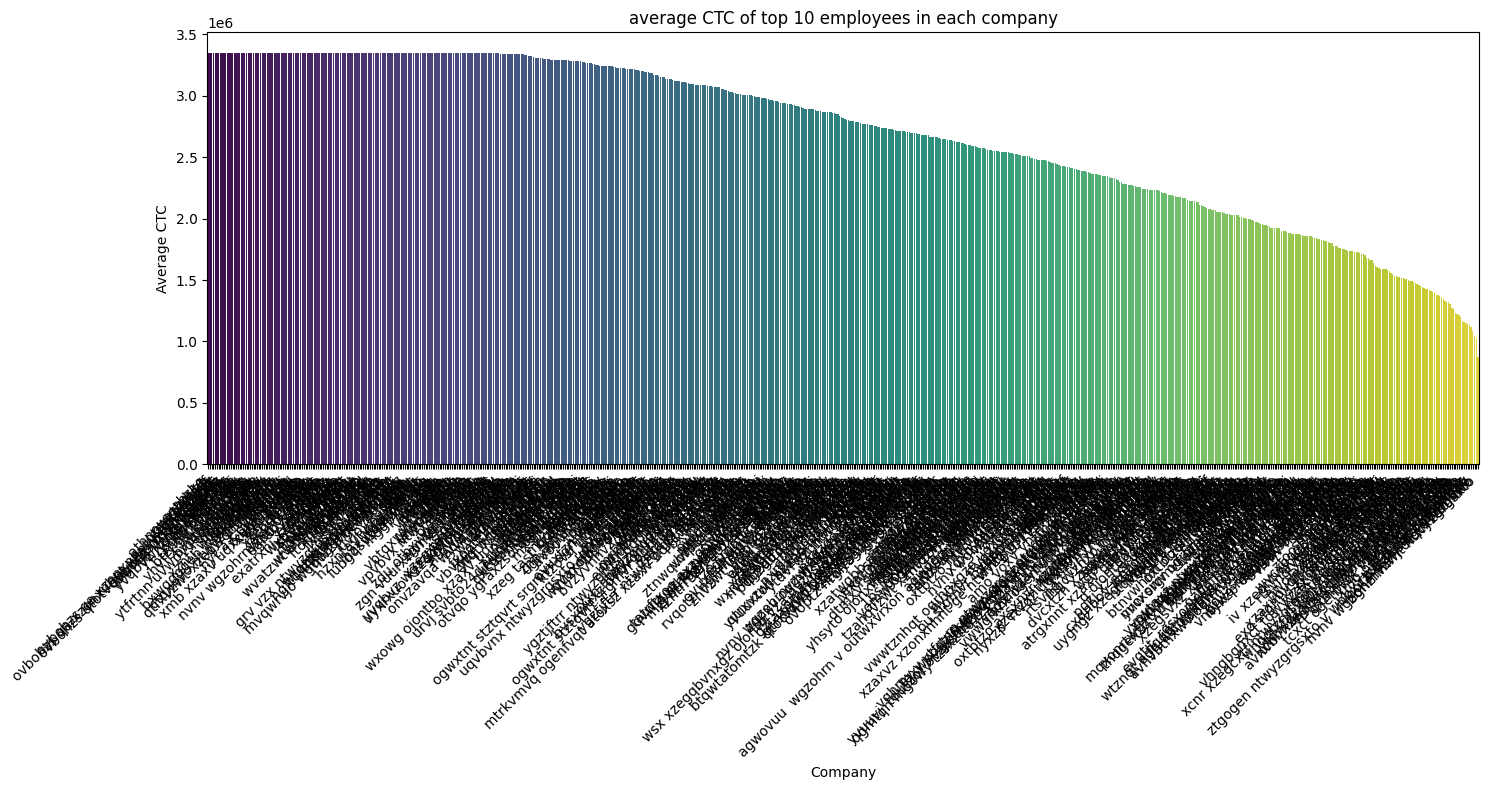

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_avg_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of top 10 employees in each company')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()


Observation

1.There is large disparity in average CTC amoung the top 10 employees across companies

2.Some companies offer more than or equal to 3.4 million
while others offer around 1.5-2 million showing big difference even at top level

3.this suggests some companies have a higher salary ceiling

4.if even the top earners have such differences,it indicates larger gaps amoung average or junior level employees

5.The companies on the left side (highest average CTC for top 10 employees) are likely product bases companied and right side top 10 average CTC are likely service based companies

Top 10 employees of data science in each company earning more than their peers - Class 1

In [ ]:
df_ds=df_copy[df_copy['job_position_filled_cleaned'].str.contains('data',case=False,na=False)].copy()
valid_companies=(df_ds.groupby('company_hash_filled_cleaned').filter(lambda x : len(x)>=20)['company_hash_filled_cleaned'].unique())
df_ds=df_ds[df_ds['company_hash_filled_cleaned'].isin(valid_companies)]
#sort
df_ds.sort_values(['company_hash_filled_cleaned','ctc'],ascending=[True,False],inplace=True)
#rank
df_ds['rank_in_ds']=df_ds.groupby('company_hash_filled_cleaned')['ctc'].rank(method='first',ascending=False)
#top 10 per company
top_10_ds_per_company=df_ds[df_ds['rank_in_ds']<=10].copy()
#add flag
top_10_ds_per_company['class']=1

In [ ]:
top_10_ds_per_company_avg=top_10_ds_per_company.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by='ctc',ascending=False)

/tmp/ipython-input-133-3835582373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_ds_per_company_avg,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


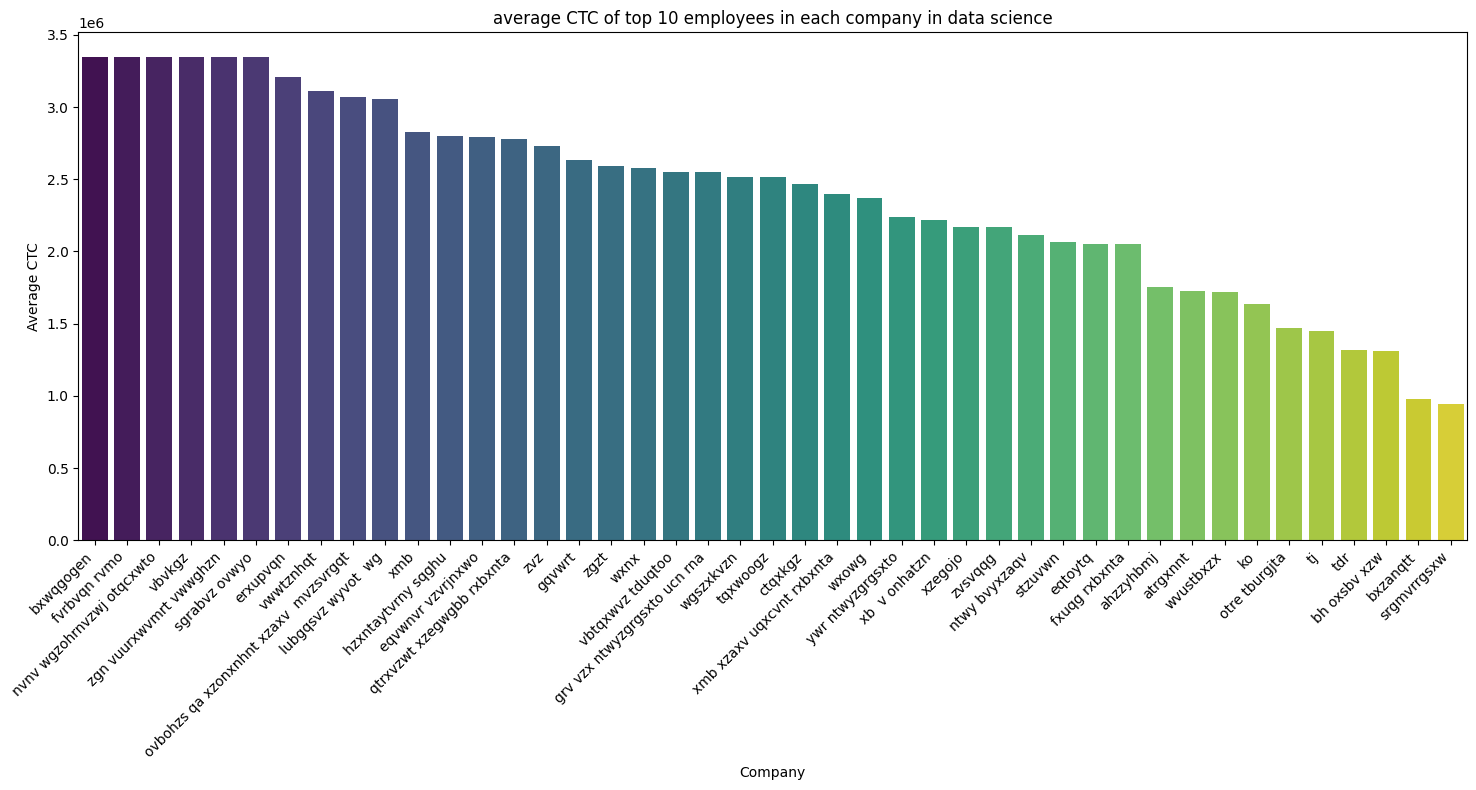

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_ds_per_company_avg,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of top 10 employees in each company in data science')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

Observation

1.some companies offers 30-34 lakh for data scientist these companies can be product based

2.several companies offer 25-26 lakh .it indicated competitive but sustainable pay level

3.several companies offer (20-24) lakh.they might operate in non tech or hybrid sectors

4.some companies give 10-15 lakh to (data scientist) employees .these companies may be early startup or service based revenue models

Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [ ]:

df_ds_bottom=df_copy[df_copy['job_position_filled_cleaned'].str.contains('data',case=False,na=False)].copy()
valid_companies=(df_ds_bottom.groupby('company_hash_filled_cleaned').filter(lambda x : len(x)>=20)['company_hash_filled_cleaned'].unique())
df_ds_bottom=df_ds_bottom[df_ds_bottom['company_hash_filled_cleaned'].isin(valid_companies)]
#sort
df_ds_bottom.sort_values(['company_hash_filled_cleaned','ctc'],ascending=[True,False],inplace=True)
#rank
df_ds_bottom['rank_in_ds']=df_ds_bottom.groupby('company_hash_filled_cleaned')['ctc'].rank(method='first',ascending=True)
#top 10 per company
bottom_10_ds_per_company=df_ds_bottom[df_ds_bottom['rank_in_ds']<=10].copy()
#add flag
bottom_10_ds_per_company['class']=3

In [ ]:
bottom_10_ds_per_company_avg=bottom_10_ds_per_company.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by='ctc',ascending=True)

/tmp/ipython-input-136-1147232583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_ds_per_company_avg,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


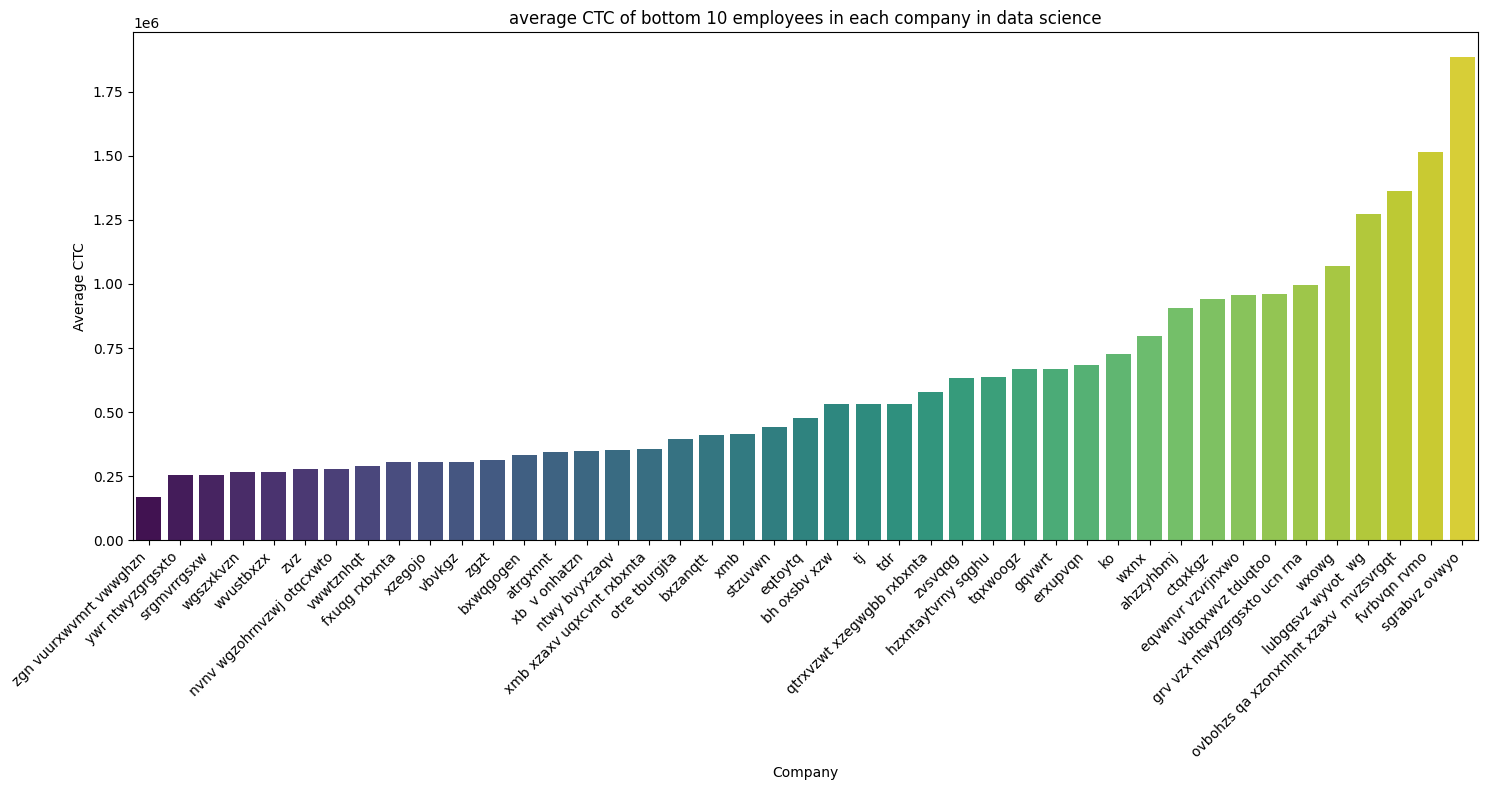

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=bottom_10_ds_per_company_avg,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of bottom 10 employees in each company in data science')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

Observation

1.we see that their is so much variation between data science employees in different companies.some companies give average of 1lakh and some companies give 17 lakh to their bottom 10 employees also

2.from 1 lakh to 5 lakh stable slope then salary increases exponentially it suggests that most bottom 10 data science employees salary lies in between 1-5 lakh may be are underpaid



Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
#sort by company and ctc
df_copy_bottom=df_copy.sort_values(['company_hash_filled_cleaned','ctc'],ascending=[True,True]).copy()
#ranking employees
df_copy_bottom['rank_in_company_bottom']=df_copy_bottom.groupby('company_hash_filled_cleaned')['ctc'].rank(method='first',ascending=False)
#assign tier1 to bottom 10 company
df_copy_bottom['Tier']=df_copy_bottom['rank_in_company_bottom'].apply(lambda x: 3 if x<=10 else None)
df_copy_bottom.drop(columns='rank_in_company_bottom',inplace=True)

In [ ]:
bottom_10_avg_ctc=df_copy_bottom.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by='ctc',ascending=True)

/tmp/ipython-input-139-3763040019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_avg_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


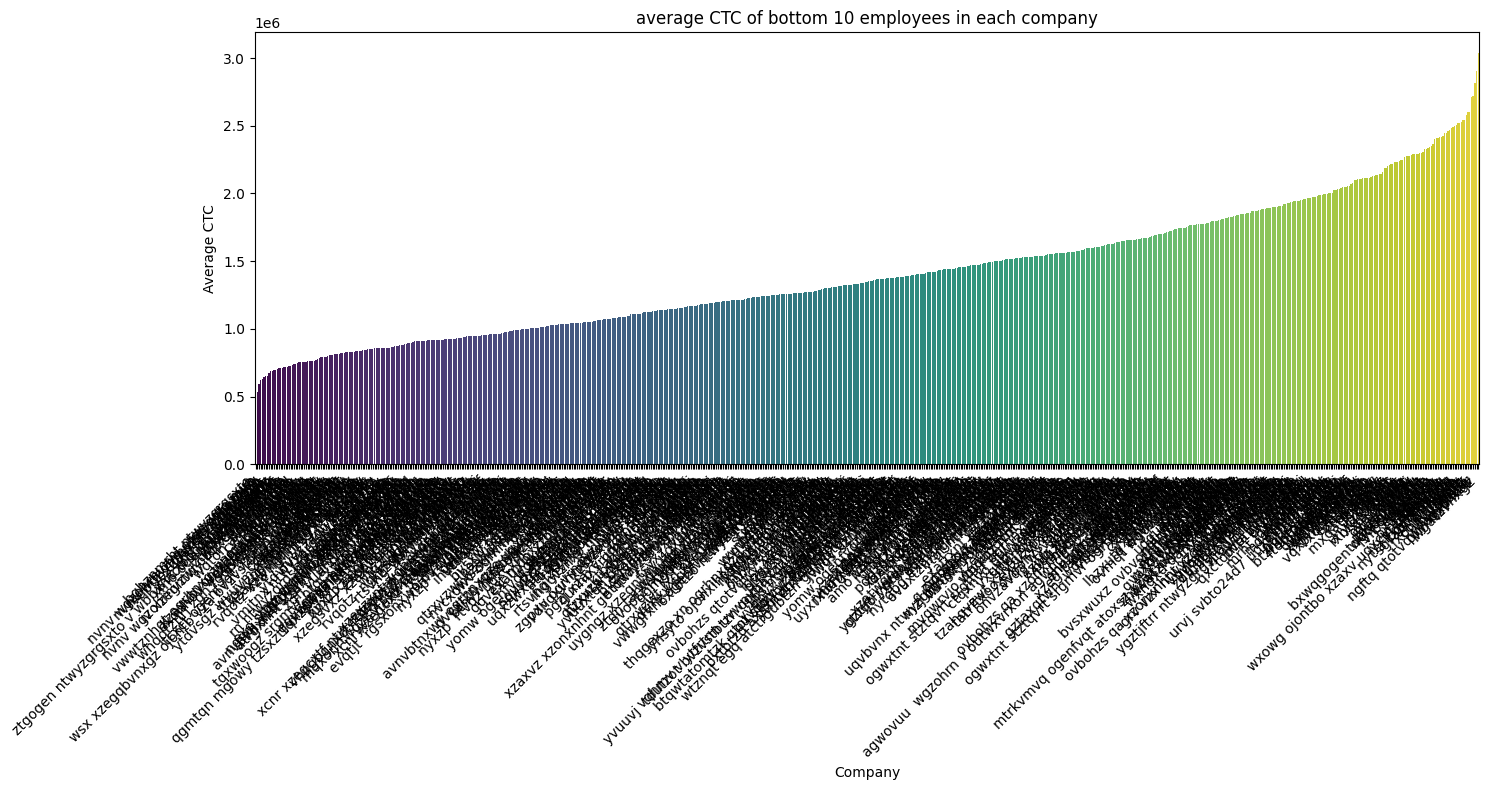

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=bottom_10_avg_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of bottom 10 employees in each company')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

In [ ]:
df_copy_bottom[df_copy_bottom['Tier']==3].shape

(7310, 8)

observation

1.there is disparity in ctc of bottom 10 employees in each company .the range of 5-30 lakh

2.even some companies bottom 10 employees also earn 30 lakh rupees may be these are startups or product based companies

3.in plot we see that until 18 lakh very stable slope then it exponentially .it suggests that average pay for bottom 10 employees lies between 5-18 lakh and their is some outliers like (25,30) lakh

Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
#filter the employee based on their years of experience(5,6,7)
df_tier_X=df_copy[df_copy['years_of_experience'].isin([5,6,7])].copy()

#sort by company,job_position,ctc
df_tier_X.sort_values(['company_hash_filled_cleaned','job_position_filled_cleaned','ctc'],ascending=[True,True,False],inplace=True)

#rank within each company and job_position
df_tier_X['rank_tier_x']=df_tier_X.groupby(['company_hash_filled_cleaned','job_position_filled_cleaned'])['ctc'].rank(method='first',ascending=False)

#keep only top10 per company-department
df_tier_X=df_tier_X[df_tier_X['rank_tier_x']<=10].copy()

#assign Tier_X flag
df_tier_X['Tier_X']=1

In [ ]:
top_5_7_job=df_tier_X[['company_hash_filled_cleaned','job_position_filled_cleaned','years_of_experience','ctc','Tier_X']]

In [ ]:
df_tier_X_count=top_5_7_job['job_position_filled_cleaned'].value_counts().reset_index().head(10)

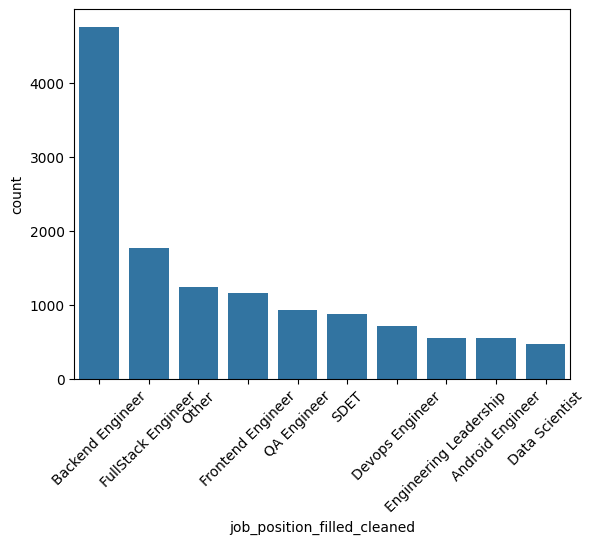

In [ ]:
sns.barplot(df_tier_X_count,x='job_position_filled_cleaned',y='count')
plt.xticks(rotation=45)
plt.show()

observation

1.most employees are backened engineer and fullstack engineer who have 5,6,7 years of experience.this suggests that most employees prefer to become backened engineer and full stack engineer

Top 10 companies (based on their CTC)

In [ ]:
df_copy.shape

(123852, 7)

In [ ]:
top_10_company_per_ctc =df_copy.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by = 'ctc',ascending=False).head(10)
top_10_company_per_ctc

company_hash_filled_cleaned           ctc
553                  wgatzvnxgz  3.038246e+06
368                  qhmqxp xzw  2.907576e+06
234      ngftq qtotvqwy wvuxnvr  2.814776e+06
560                    wgytoxnj  2.722653e+06
149                        hmtq  2.715441e+06
512                   vnrvooxvz  2.601961e+06
536                        vwpg  2.598438e+06
162                      ihmgrt  2.578532e+06
296                  ohbg rgsxw  2.545238e+06
398                 rxcouvwtwgb  2.540395e+06

/tmp/ipython-input-147-4163668068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_company_per_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


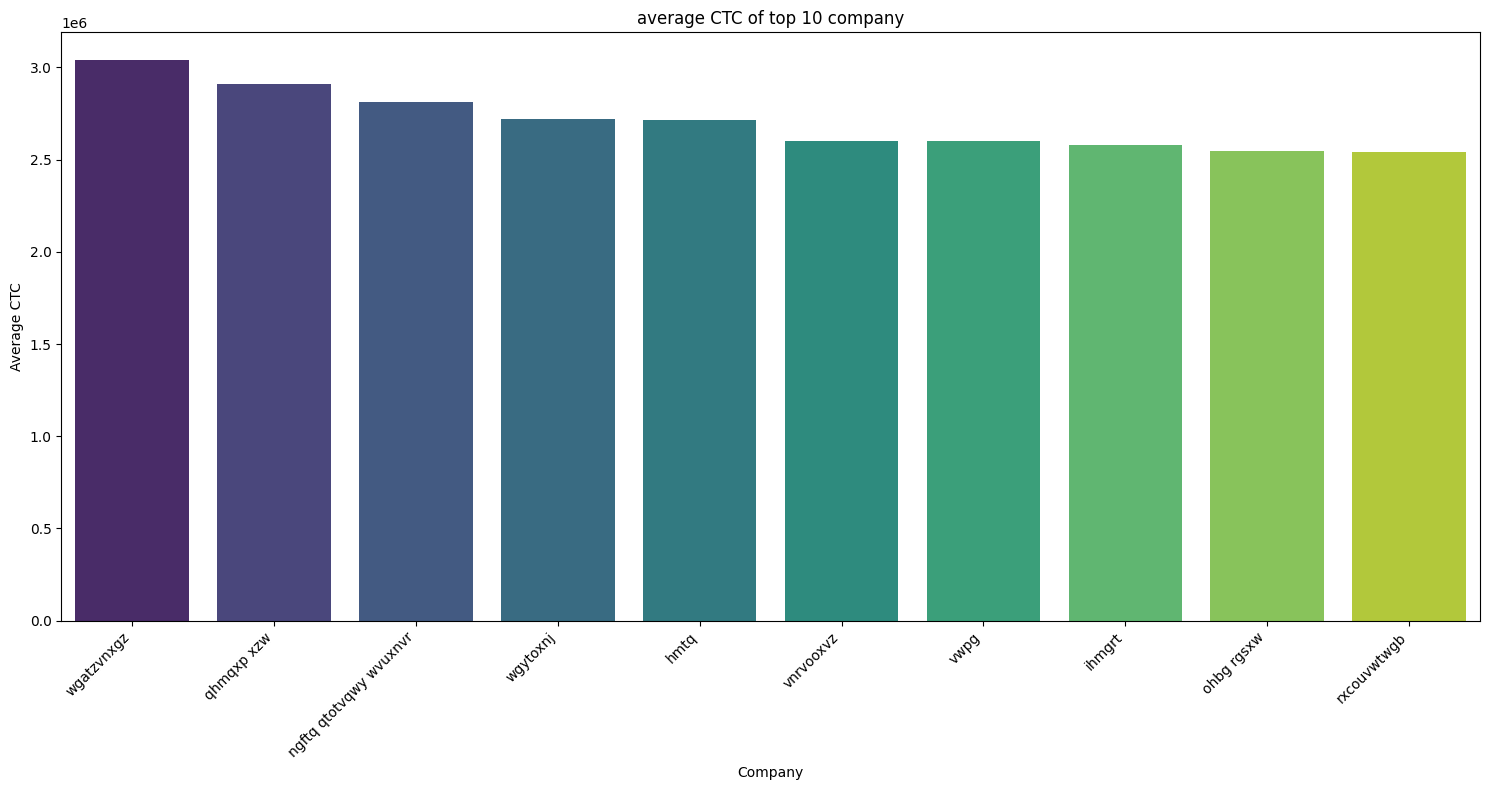

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_company_per_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of top 10 company')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

Observation

1.average CTC of top 10 company varies from (25-30)lakh.they are mostly product based or startups



Bottom 10 companies based on their ctc

In [ ]:
bottom_10_company_per_ctc =df_copy.groupby('company_hash_filled_cleaned')['ctc'].mean().reset_index().sort_values(by = 'ctc',ascending=True).head(10)
bottom_10_company_per_ctc

company_hash_filled_cleaned            ctc
33          bghznmrht ntwyzgrgsxto  486409.000000
265  nvnv wgzohrnvzwj otqcxwto nwo  532597.402597
642                    xzegojo mub  595238.095238
264      nvnv wgzohrnvzwj otqcxwto  619843.931139
393        rvqotz  nghmqg xzegntwy  631116.279070
73              bxzaexqt ogrhnxgzo  643834.747826
568                         wjxtzn  650574.701149
641                        xzegojo  651018.212476
255                ntrtutqegqbvzwt  675644.433333
154                     hztburgjta  685353.830769

/tmp/ipython-input-149-3738451911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_company_per_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')


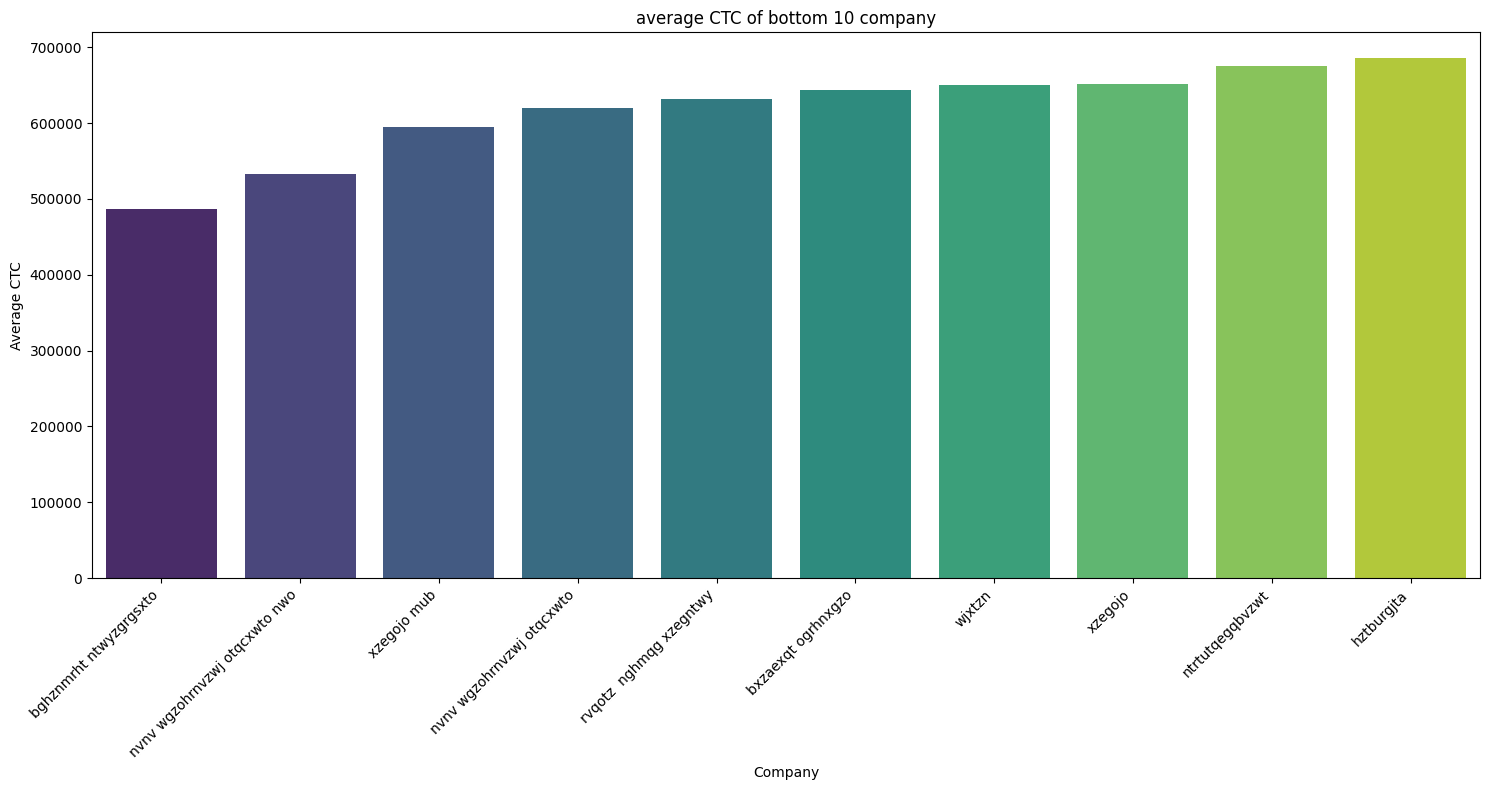

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=bottom_10_company_per_ctc,x='company_hash_filled_cleaned',y='ctc',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('average CTC of bottom 10 company')
plt.ylabel('Average CTC')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

Obseravation

1.average ctc of bottom 10 companies lies between (4.5-6)lakh

2.this suggest that at least every company has average CTC of 4.5 lakh

Top 2 positions in every company (based on their CTC)

In [ ]:
top2_roles_per_company=df_copy.groupby(['company_hash_filled_cleaned','job_position_filled_cleaned'])['ctc'].mean().reset_index()
top2_roles_per_company

company_hash_filled_cleaned             job_position_filled_cleaned  \
0                            1bs                        Android Engineer   
1                            1bs                        Backend Engineer   
2                            1bs                          Data Scientist   
3                            1bs                      Engineering Intern   
4                            1bs                  Engineering Leadership   
...                          ...                                     ...   
9628                   zxztrtvuo                      FullStack Engineer   
9629                   zxztrtvuo  Member of Technical Staff at Nineleaps   
9630                   zxztrtvuo                                   Other   
9631                   zxztrtvuo               Software Developer Intern   
9632                   zxztrtvuo                            iOS Engineer   

               ctc  
0     7.333333e+05  
1     1.484762e+06  
2     9.500000e+05  
3     1.200000e+06  
4     2.475000e+06  
...            ...  
9628  8.725714e+05  
9629  1.200000e+06  
9630  4.500000e+05  
9631  1.200000e+06  
9632  1.200000e+06  

[9633 rows x 3 columns]

In [ ]:
top_2_roles=top2_roles_per_company.groupby('company_hash_filled_cleaned').apply(lambda x : x.sort_values(by='ctc',ascending=False).head(2)).reset_index(drop=True)
top_2_roles.head(10)

/tmp/ipython-input-151-551659884.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_2_roles=top2_roles_per_company.groupby('company_hash_filled_cleaned').apply(lambda x : x.sort_values(by='ctc',ascending=False).head(2)).reset_index(drop=True)


company_hash_filled_cleaned job_position_filled_cleaned           ctc
0                         1bs                iOS Engineer  2.700000e+06
1                         1bs      Engineering Leadership  2.475000e+06
2    1bs ntwyzgrgsxto ucn rna            Backend Engineer  1.446296e+06
3    1bs ntwyzgrgsxto ucn rna          FullStack Engineer  1.425000e+06
4                       247vx      Engineering Leadership  2.968000e+06
5                       247vx             Product Manager  2.500000e+06
6                          NA                Data Analyst  2.000000e+06
7                          NA      Database Administrator  1.925000e+06
8              adw ntwyzgrgsj             Product Manager  3.350000e+06
9              adw ntwyzgrgsj      Engineering Leadership  2.340000e+06

In [ ]:
top_2_count=top_2_roles['job_position_filled_cleaned'].value_counts().reset_index()[0:20]

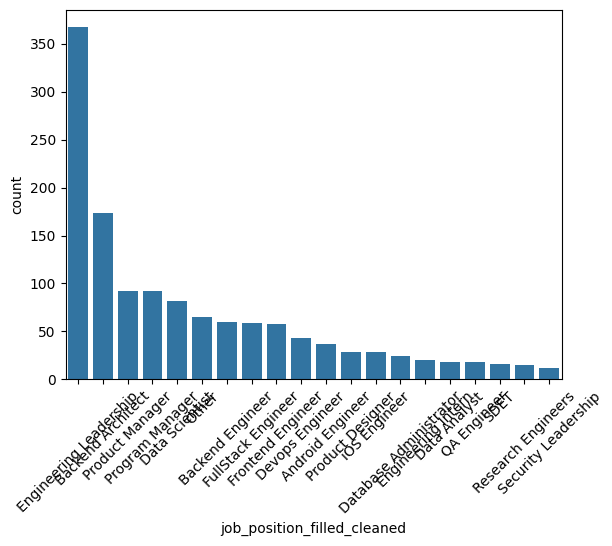

In [ ]:
sns.barplot(top_2_count,x='job_position_filled_cleaned',y='count')
plt.xticks(rotation=45)
plt.show()

Observation

1.top 2 roles in company based on their ctc is engineering leadership,backened architect,product manager,program manager,data scientist

# Data preprocessing for Unsupervised clustering



In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#encode categoricals
#le_job=LabelEncoder()
#le_company=LabelEncoder()
#df_copyy['job_encoded']=le_job.fit_transform(df_copyy['job_position_filled_cleaned'])
#df_copyy['company_encoded']=le_company.fit_transform(df_copyy['company_hash_filled_cleaned'])

used the label encoding on categorical column but it impacts on cluster to avoid errors do the ctc average based encoding

In [ ]:
median_job=df_copyy.groupby('job_position_filled_cleaned')['ctc'].mean()

In [ ]:
median_company=df_copyy.groupby('company_hash_filled_cleaned')['ctc'].mean()

In [ ]:
df_copyy['job_encoded']=df_copyy['job_position_filled_cleaned'].map(median_job)
df_copyy['company_encoded']=df_copyy['company_hash_filled_cleaned'].map(median_company)

In [ ]:
features_num=['ctc','years_of_experience']

features_num_col=['ctc','years_of_experience','job_encoded','company_encoded']

In [ ]:
#scale numerical features

scaler=StandardScaler()
df_copyy_num=df_copyy[features_num]
df_copyy_num_scaled=scaler.fit_transform(df_copyy_num)


In [ ]:
#scale all features

#scaler=StandardScaler()
#df_copyy_all=df_copyy[features_num_col]
#df_copyy_all_scaled=scaler.fit_transform(df_copyy_all)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler=RobustScaler()
df_copyy_all=df_copyy[features_num_col]
df_copyy_all_scaled=scaler.fit_transform(df_copyy_all)

try the standard scaling also but because of skewed data and outliers i used robust scaling.robust scaler is a robust to outlier

standard scaling we generally used when data is normal distribution  

minmaxscaler compress all values into the range[0,1]

one large outlier can squash most values very close to zero

In [ ]:
df_copyy_num_scaled=pd.DataFrame(df_copyy_num_scaled,columns=df_copyy_num.columns)
df_copyy_num_scaled.head()

ctc  years_of_experience
0 -0.180062            -0.140089
1 -0.899625            -0.882377
2  0.816255             0.107340
3 -0.622869            -0.634948
4  0.152044            -0.634948

In [ ]:
df_copyy_all_scaled=pd.DataFrame(df_copyy_all_scaled,columns=df_copyy_all.columns)
df_copyy_all_scaled.head()

ctc  years_of_experience  job_encoded  company_encoded
0  0.090909                 0.00    -1.849325        -0.037316
1 -0.500001                -0.75    -0.417136         0.042863
2  0.909091                 0.25     0.000000         1.016204
3 -0.272727                -0.50     0.000000         0.620942
4  0.363636                -0.50    -0.417136        -0.246590

In [ ]:
df_copyy_all_scaled.shape

(199880, 4)

# Kmeans

elbow method

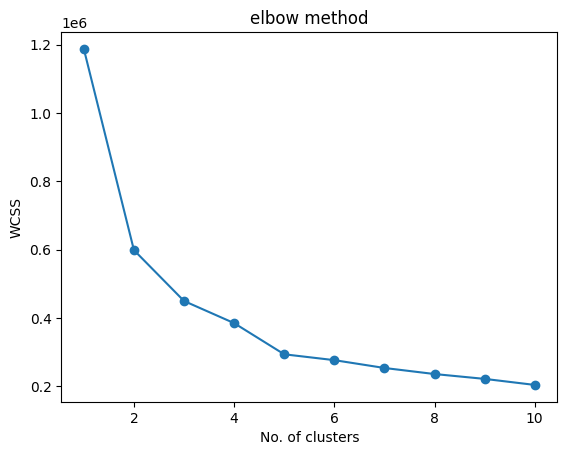

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df_copyy_all_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Observation

1.elbow method used for find the best value for k(no. of clusters).we see in line plot WCSS is decreasing sharply until 3 or 4 .after that less change in WCSS so 3 or 4 can be a optimal value for no.of clusters

# Clustering tendency(quantitive and visual(pca and tsne)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_copyy_all_scaled[0:50000])
                for k in range(1, 10)]

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(df_copyy_all_scaled[0:50000], model.labels_)
                     for model in kmeans_per_k[1:]]

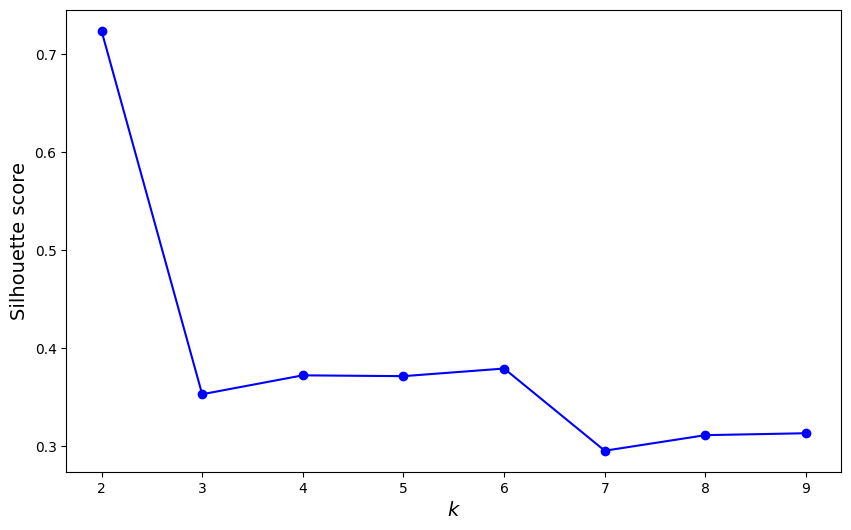

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Observation

value of silhouette score decreasing sharply until k=3 then increases then remains constant until k=6 then decreasing k=4 is optimal values for clusters based on elbow and silhouette score

In [ ]:
df_copyy_all_scaled.shape

(199880, 4)

In [ ]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
ch_score=calinski_harabasz_score(df_copyy_all_scaled,kmeans.labels_)
db_score=davies_bouldin_score(df_copyy_all_scaled,kmeans.labels_)

print('calinski-Harabasz:',ch_score)
print('Davies-Boouldin:',db_score)

calinski-Harabasz: 106814.3285348683
Davies-Boouldin: 1.2038527044998395


observation

quantitative metrics like silhouette score and calinski-Harabasz index,affirming the suitability of applying clustering techniques

In [ ]:
optimal_k=4
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_copyy_all_scaled)


KMeans(n_clusters=4, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components_pca = pca.fit_transform(df_copyy_all_scaled)

In [ ]:
clusters = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters['label'] = kmeans.labels_
clusters.head(3)

X1        X2  label
0 -1.689500  0.239492      0
1 -0.563557 -0.966197      0
2  0.393462  0.747057      3

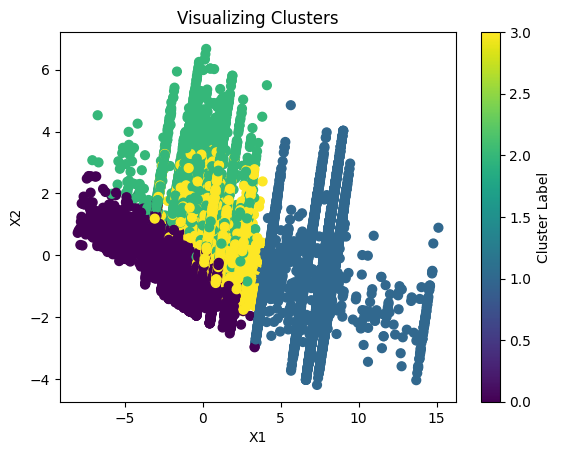

In [ ]:
def viz_clusters(clusters):
    scatter=plt.scatter(clusters['X1'], clusters['X2'], c=clusters['label'], s = 40)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Visualizing Clusters')
    plt.colorbar(scatter,label='Cluster Label')

viz_clusters(clusters)

observation
we can distinct clusters in a PCA plot,it is a very good indicator that the original high dimensional data has clustering tendency

4 distinct colors suugest clustering algorithm found 4 main groups

green and yellow clusters are some overlap

purple and dark green are clearly separated

pca plot confirms clustering tendency in the data

In [ ]:
df_copyy['labels']=kmeans.labels_

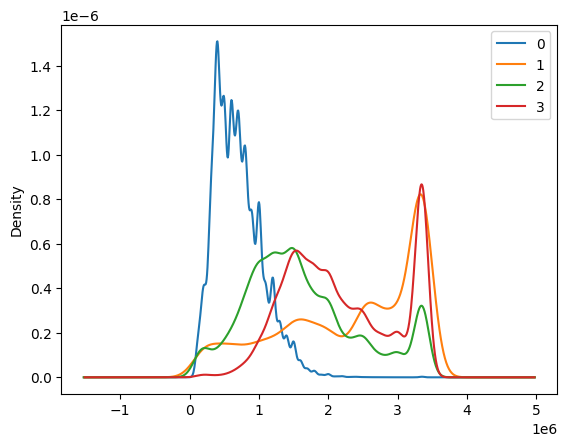

In [ ]:
df_copyy.groupby(kmeans.labels_)['ctc'].plot(kind='kde')
plt.legend()

observations

label 0
very sharp peak at low CTC(8 lakh).this cluster likely contains low to mid-paying companies with low-varaince

label 1
inconsistent distribution may indicate noise or hard to cluster companies

label 2
moderate peak between 25 to 35 lakh
highly paying cluster with more spread suggesting
mid to senior level roles

label 3
flatter distribution between 10lakh to 15 lakh
no sharp peaks implies diverse salaries within the cluster




In [ ]:
df_copyy.groupby('labels')[['ctc','years_of_experience']].describe()

ctc                                                              \
           count          mean           std       min        25%        50%   
labels                                                                         
0       114118.0  7.002314e+05  3.421389e+05  100800.0   430000.0   650000.0   
1        10259.0  2.313280e+06  1.007449e+06  101000.0  1500000.0  2600000.0   
2        29392.0  1.628518e+06  8.277753e+05  101000.0  1000000.0  1500000.0   
3        46111.0  2.187613e+06  7.846233e+05  110000.0  1550000.0  2000000.0   

                             years_of_experience                            \
              75%        max               count       mean       std  min   
labels                                                                       
0        900000.0  3350000.0            114118.0   2.859172  2.031012  0.0   
1       3350000.0  3350000.0             10259.0  10.071742  5.885046  0.0   
2       2030000.0  3350000.0             29392.0  10.711418  3.604236  5.0   
3       3000000.0  3350000.0             46111.0   3.648782  2.396480  0.0   

                               
        25%   50%   75%   max  
labels                         
0       1.0   3.0   4.0  11.0  
1       6.0   9.0  14.0  31.0  
2       8.0  10.0  12.0  31.0  
3       2.0   4.0   5.0  13.0

In [ ]:
df_copyy.groupby('labels')[['ctc','years_of_experience']].mean()

ctc  years_of_experience
labels                                   
0       7.002314e+05             2.859172
1       2.313280e+06            10.071742
2       1.628518e+06            10.711418
3       2.187613e+06             3.648782

observation

label 0
low CTC and low experience
likely freshers or entry level roles in small companies

label 1
high ctc with low experience
could be high performers,top tier startups or elite companies

label 2
medium-high CTC with very high experience
possibly senior professionals or mid-level engineers in average paying firms

label 3

high CTC with high experience
likely senior professionals in top paying firms

In [ ]:
features_cols=['ctc', 'years_of_experience', 'job_encoded', 'company_encoded']
features_cols

['ctc', 'years_of_experience', 'job_encoded', 'company_encoded']

In [ ]:
df_copyy_all_scaled

ctc  years_of_experience  job_encoded  company_encoded
0       0.090909                 0.00    -1.849325        -0.037316
1      -0.500001                -0.75    -0.417136         0.042863
2       0.909091                 0.25     0.000000         1.016204
3      -0.272727                -0.50     0.000000         0.620942
4       0.363636                -0.50    -0.417136        -0.246590
...          ...                  ...          ...              ...
199875 -0.709091                 1.75     0.000000         1.031776
199876 -0.454545                -0.25     0.000000         0.304834
199877 -0.272727                -1.00     0.000000         0.291250
199878  2.136364                -1.00     0.000000         0.068068
199879  0.218182                -0.50     0.000000         1.071517

[199880 rows x 4 columns]

In [ ]:
df_copyy_all_scaled['kmeans_cluster']=kmeans.labels_

In [ ]:
# randomly choose the 20000 observations for tsne .
# 2 lakh observation take so much time so 20000 give some idea about local clusters

In [ ]:
sample_df=df_copyy_all_scaled.sample(n=20000,random_state=42)
sample_df=sample_df.reset_index(drop=True)
sampled_X=sample_df[features_cols]
sampled_labels=sample_df['kmeans_cluster']

In [ ]:
sample_df['kmeans_cluster'].isna().sum(axis=0)

np.int64(0)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=50)

components_tsne = tsne.fit_transform(sampled_X)


In [ ]:
clusters_tsne = pd.DataFrame(components_tsne, columns=['X1', 'X2'])
clusters_tsne['label']=sampled_labels
clusters_tsne.head(3)


X1         X2  label
0  75.934990 -18.368649      0
1  15.855318 -83.881599      0
2 -10.985054 -96.304977      0

In [ ]:
clusters_tsne['label'].isna().sum(axis=0)

np.int64(0)

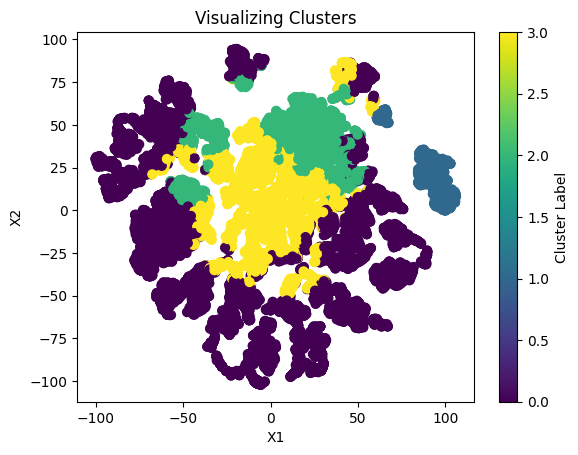

In [ ]:
viz_clusters(clusters_tsne)



Observations

cluster 0(purple) is fairly comapct and dense

cluster 1 and cluster 2(yellow,green) are more dispersed and overlapping  

tsne maintains local structure so areas with tight blobs (like cluster 0) mean those data points are strongly related

# Hierarchial clustering

In [ ]:
#hierarchial clustering so much time.time complexity is very high.so i do clustering on 20000 observations

In [ ]:
sample_df_hie=sample_df.drop(columns='kmeans_cluster').head(20000)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
import seaborn as sns

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch


Z = sch.linkage(sample_df_hie, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

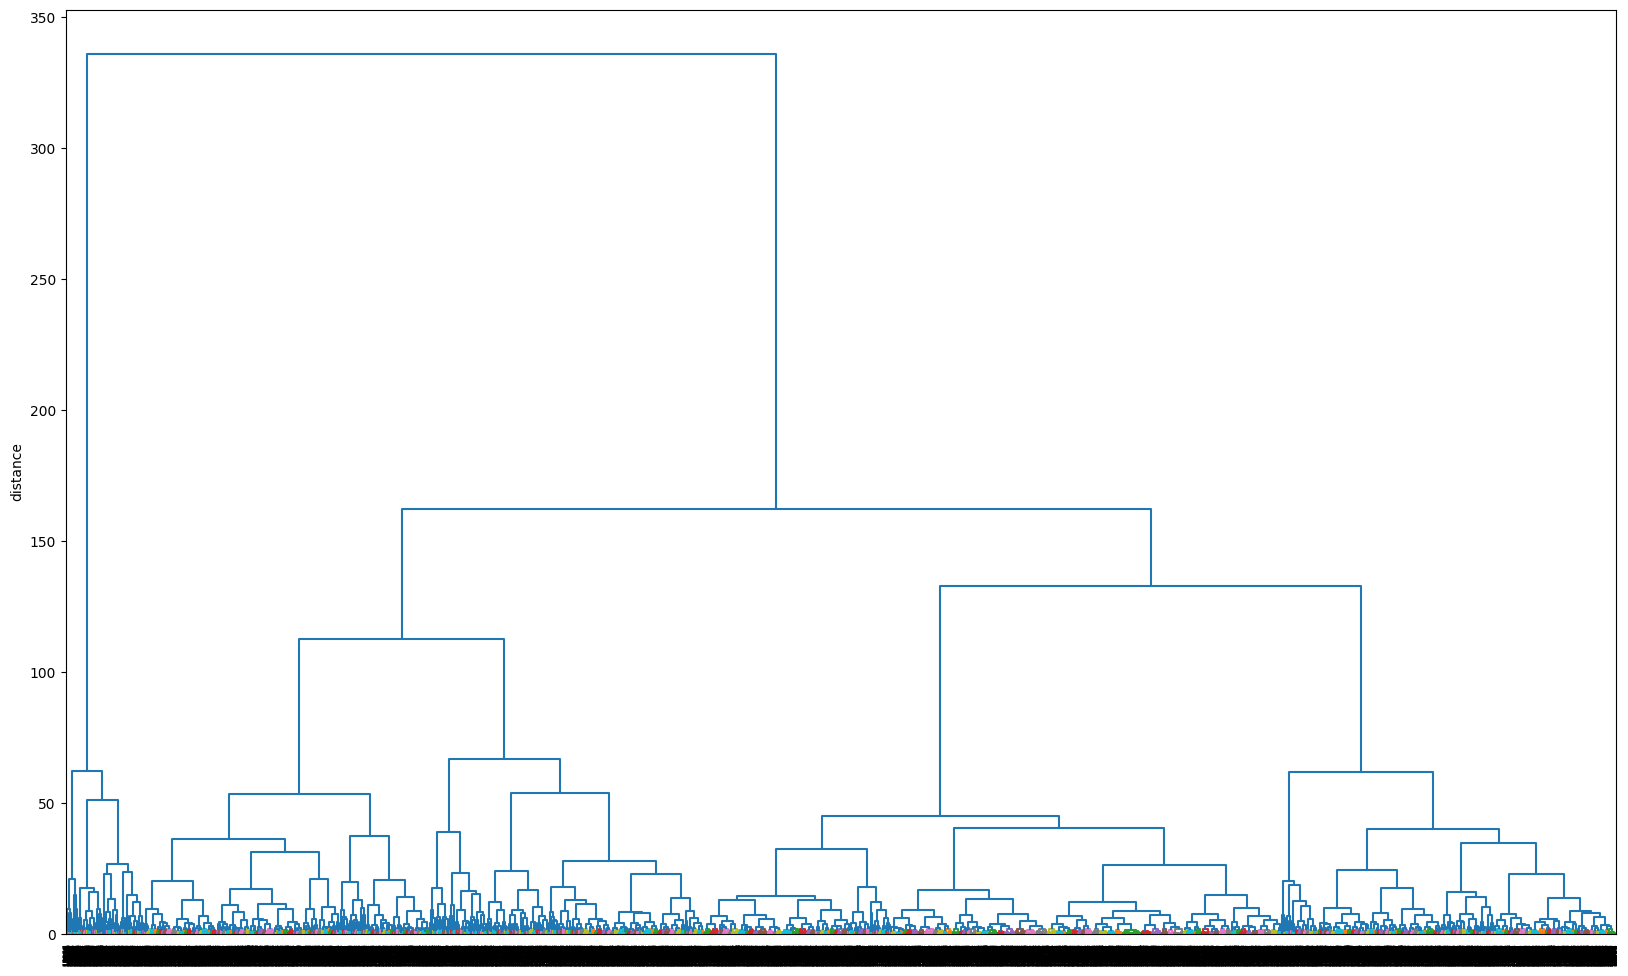

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample_df_hie.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Observation

we can see that from dendrogram that optimal value for clustering can be 4 or 5

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(sample_df_hie)

In [ ]:
viz_df = sample_df_hie
viz_df['Y_Predicted'] = y_pred


In [ ]:
df_copyy.drop('labels',inplace=True,axis=1)

In [ ]:
df_hierarchy=df_copyy.head(20000)

In [ ]:
df_hierarchy['labels']= y_pred

/tmp/ipython-input-201-324290739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hierarchy['labels']= y_pred


In [ ]:
df_hierarchy.groupby('labels')[['ctc','years_of_experience']].describe()

ctc                                                             \
         count          mean            std       min       25%       50%   
labels                                                                      
0       7225.0  1.054967e+06  830646.207174  120000.0  490000.0  770000.0   
1       1017.0  1.074679e+06  844774.417831  110000.0  500000.0  800000.0   
2       4304.0  1.069847e+06  844118.697672  105000.0  500000.0  780000.0   
3       7454.0  1.051400e+06  830621.033208  110000.0  480000.0  760000.0   

                             years_of_experience                           \
              75%        max               count      mean       std  min   
labels                                                                      
0       1300000.0  3350000.0              7225.0  4.194464  3.592354  0.0   
1       1320000.0  3350000.0              1017.0  4.154376  3.463358  0.0   
2       1350000.0  3350000.0              4304.0  4.092240  3.396570  0.0   
3       1300000.0  3350000.0              7454.0  4.068285  3.410000  0.0   

                             
        25%  50%  75%   max  
labels                       
0       2.0  3.0  6.0  31.0  
1       2.0  3.0  6.0  30.0  
2       2.0  3.0  6.0  31.0  
3       2.0  3.0  6.0  30.0

In [ ]:
df_hierarchy.groupby('labels')[['ctc','years_of_experience']].mean()

ctc  years_of_experience
labels                                   
0       1.054967e+06             4.194464
1       1.074679e+06             4.154376
2       1.069847e+06             4.092240
3       1.051400e+06             4.068285

In [ ]:
viz_df.head()

ctc  years_of_experience  job_encoded  company_encoded  Y_Predicted
0 -0.545455                 0.25     0.000000        -0.466791            3
1 -0.290909                -0.50     0.000000        -0.627997            3
2 -0.454545                -0.75     0.000000        -0.590859            3
3 -0.409091                -0.25     0.890903        -0.711203            3
4  0.727273                 0.50     0.000000         0.777941            0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sample_df_hie)

# Attaching labels for data points
labels = viz_df['Y_Predicted']

# Create DataFrame
pca_df = pd.DataFrame(data=np.vstack((pca_data.T, labels)).T, columns=("1st_principal", "2nd_principal", "label"))

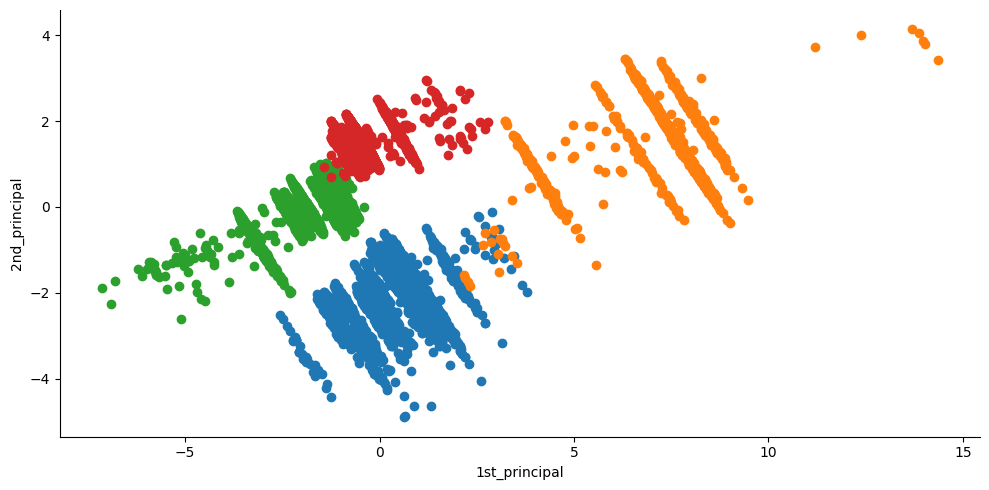

In [ ]:
# Visualization
g = sns.FacetGrid(pca_df, hue="label",height=5 ,aspect= 2)
g.map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

observation

PCA plot shows some degree of separation between clusters,especially in horizontal bands,but there is still overlap.this suggests moderate linear separability

pca might not capture complex,non-linear structures fully.

blue cluster appear denser than others

the spread along principal components varies.orange cluster is more stretched out,indicating higher variance within the group

In [ ]:
from sklearn.manifold import TSNE

# t-SNE dimensionality reduction
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(sample_df_hie)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(data=np.vstack((tsne_data.T, labels)).T, columns=("Dim_1", "Dim_2", "label"))

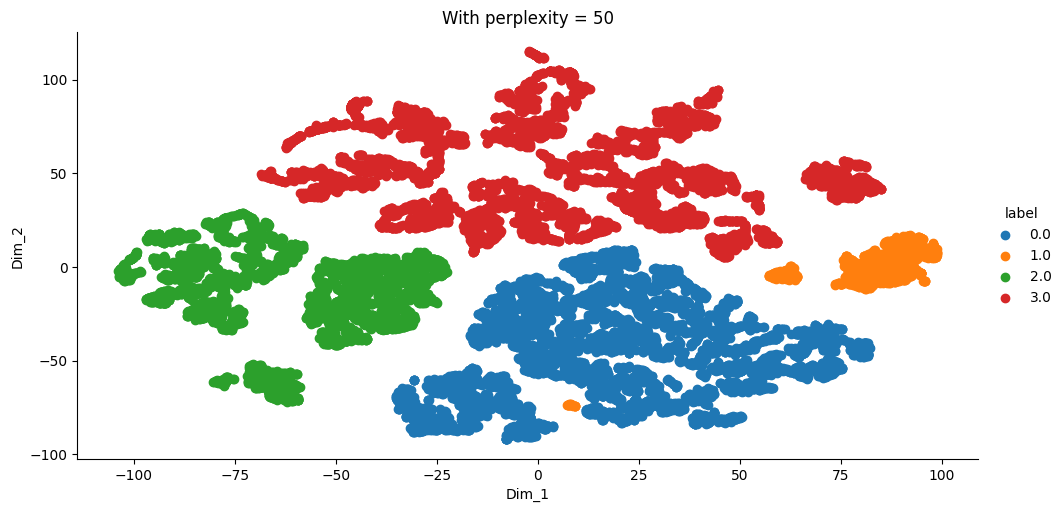

In [ ]:
# Plot using Seaborn
sns.FacetGrid(tsne_df, hue="label", height=5 ,aspect= 2).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

observation

tsne reveals well-separated,dense clusters-this suggests strong clustering tendency and that hierarchial clustering captured meaningful structure

tsne is good at showing non linear structures

observation

both pca and tsne show distinguishable clusters,especially in the tsne plot,indicating real cluster structure

hierarchial clustering is effective in capturing clusters

In [ ]:
!pip install hdbscan


In [ ]:
import hdbscan

In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=50)
cluster_labels=clusterer.fit_predict(df_copyy_all_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components_pca = pca.fit_transform(df_copyy_all_scaled)

In [ ]:
clusterss = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusterss['label'] = cluster_labels
clusterss.head(3)

X1        X2  label
0 -1.863944 -0.294145     39
1 -0.839001 -1.165802     60
2  0.897693  1.988170    266

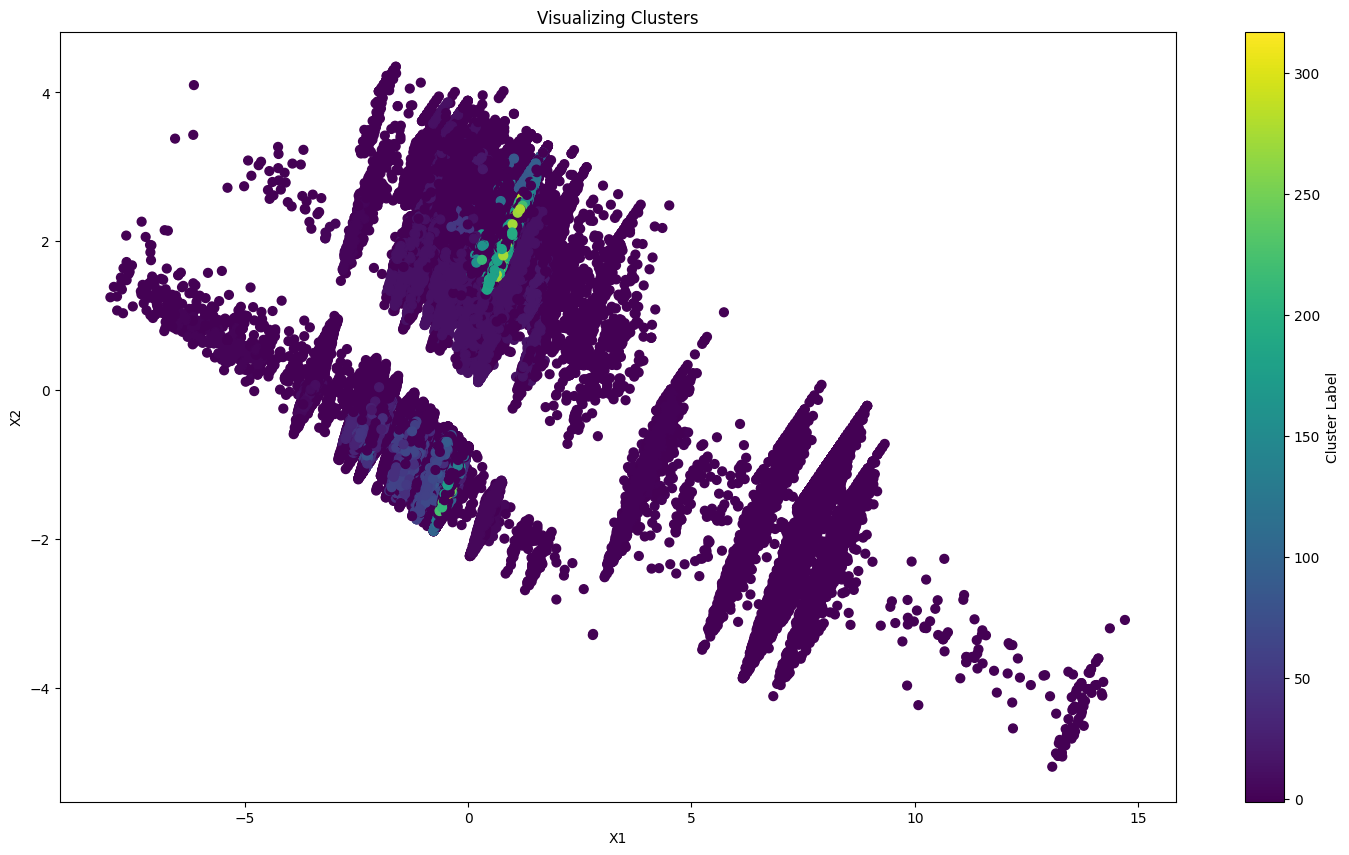

In [ ]:
def viz_clusters(clusterss):
    scatter=plt.scatter(clusterss['X1'], clusterss['X2'], c=clusterss['label'], s = 40)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Visualizing Clusters')
    plt.colorbar(scatter,label='Cluster Label')

viz_clusters(clusterss)

# Business insights

1.optimal value of clusters based on various methods(elobow,silhouette,tsne,pca)
cluster 0-low ctc,low experience
dense and compact indiactes a strong relationship amoung individuals

likely entry level employees,freshers or from smaller companies
ctc around 8 lakh

cluster 1-high ctc low experience

possibly top-tier talent,high performers,or working in elite/product startups

inconsistent shape suggests may include outliers or niche roles

cluster 2
 high experience,medium -high ctc
likely senior professionals in average paying companies

more spread implying diverse roles or inconsistent pay practices

cluster 3 -high experience,high ctc

these are top earners probably tech leads,architects or senior managers


2.salary distribution patterns

heavy right skewed CTC distribution suggests a small portion of employees earning heavily.

median ctc around 10lpa

outliers even at high experience levels indicate career stagnation,role mismatch or presence in service based firms

3. Engineering leadership,backend architects and product managers command topCTCs(15-35lpa)

full stack engineers and data scientists are also get good salary

4.some companies consistently offers 3.4M+ to top performers,suggesting product based or high revenue firms

others offers 1.5 -2 m indicating service-based or cost sensitive companies

5.49000 people are outperformers earning more than peers-great pool of retention

However 64000 underpaid employees pose a retention and morale risk

in some companies even bottom 10 employees earn 30LPA likely due to aggressive talent acquisition in startups or product firms

# Recommendations

1.Cluster 0:nurture and train

target these early career individuals with growth tracks
these are low cost talent -provide mentorship and clear career paths
low salaries may increase job switching behaviour so monitoring to avoid attrition

2.cluster 1 .protect high potential talent

provide leadership grooming,early promotions and stock options

3.cluster 2-optimize pay structure

these are experienced professionals earning moderately provide growth plans or lateral role shifts to keep them engaged

4.cluster 3

these employees are senior contributors in high paying comapnies

offer long term incentives to maintain loyalty






5.benchmark salary bands across similar companies to avoid over or underpaying especially crucial for roles like data scientist and engineers

6.top roles like engineering leaders and backend architects are important,attract and retain them with perks

7.focus hiring on mid -experience candidates (3-7 years)with proven performance .for cost effrective growth target support roles in bulk but ensure fair,competitive compensation to avoid underpaying